In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
all_paragraphs = pd.read_csv('speeches_partymentions_paragraph.csv',  encoding="utf-8")

all_paragraphs['Mentioned parties'] = all_paragraphs['Mentioned parties'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
all_paragraphs['Mentioned parties'] = all_paragraphs['Mentioned parties'].apply(
    lambda x: x if isinstance(x, list) else []
)

In [67]:
all_paragraphs.iloc[277293] # pantürkisch

Filename                                                           BT_19_236.xml
Period                                                                        19
Date                                                                  2021-06-24
Item                           Abgabe einer Regierungserklärung durch die Bun...
Speech #                                                                   32631
Paragraph #                                                                    4
Speaker                                                             Frauke Petry
Role                                                                          mp
Gender                                                                  weiblich
Party                                                                  parteilos
Paragraph                      Frau Merkel unterstützt mit einem weiteren Flü...
Interjection                                                               False
next_verbal_interjection    

In [68]:
if isinstance(all_paragraphs.at[277293, "Mentioned parties"], list):
    all_paragraphs.at[277293, "Mentioned parties"] = [
        party for party in all_paragraphs.at[277293, "Mentioned parties"] if party != "CDU/CSU"
    ]

In [69]:
all_paragraphs.iloc[277293]

Filename                                                           BT_19_236.xml
Period                                                                        19
Date                                                                  2021-06-24
Item                           Abgabe einer Regierungserklärung durch die Bun...
Speech #                                                                   32631
Paragraph #                                                                    4
Speaker                                                             Frauke Petry
Role                                                                          mp
Gender                                                                  weiblich
Party                                                                  parteilos
Paragraph                      Frau Merkel unterstützt mit einem weiteren Flü...
Interjection                                                               False
next_verbal_interjection    

Mentioned parties   AfD  CDU/CSU  DIE LINKE   FDP  GRUENE  Government  \
Party                                                                   
AfD                2882     1131        982  1005    1261        2676   
CDU/CSU            2244     2949       1570  1679    1743        2324   
DIE LINKE          1094     1098       2599   901     487        2850   
Die PARTEI            4       12          4     6       6          17   
FDP                 658     1074        567   961     807        2581   
GRUENE              903     1121        324   785    1223        2732   
LKR                  13       15          9    18      29          48   
SPD                1744     1025        634  1427     818        1338   
parteilos            67       58         57    50      76         125   

Mentioned parties  Opposition   SPD  
Party                                
AfD                       284   981  
CDU/CSU                   680   900  
DIE LINKE                 129   790  
Die PA

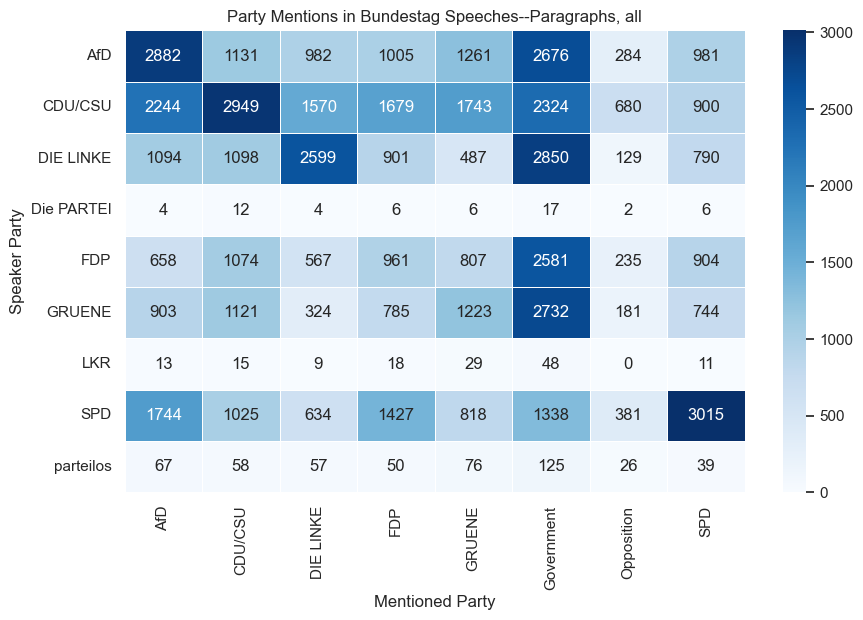

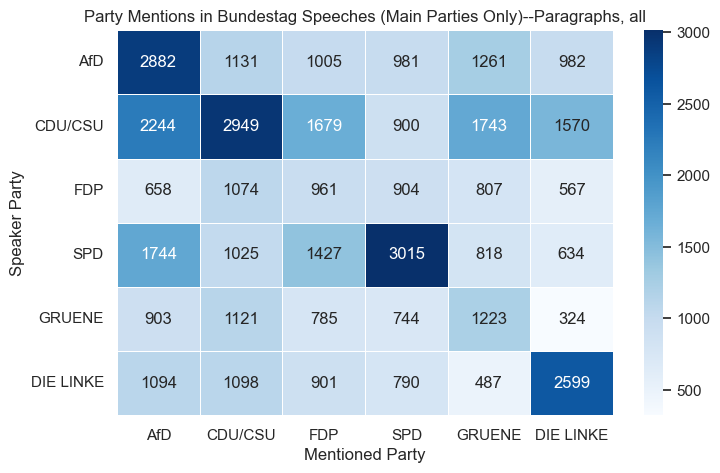

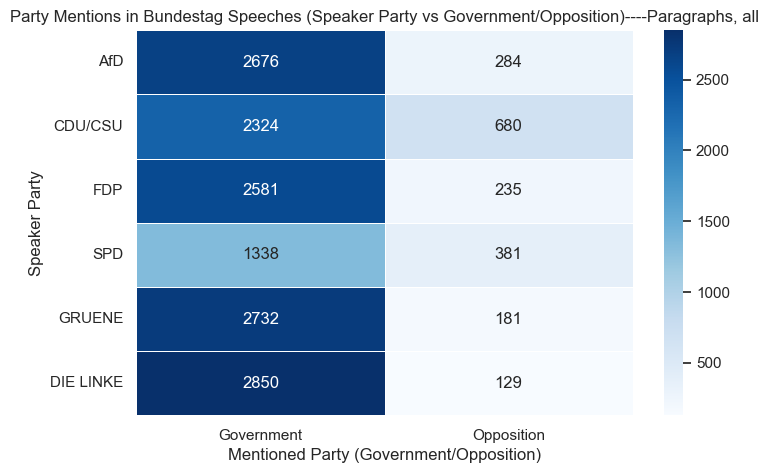

In [70]:

all_paragraphs_exploded = all_paragraphs.explode("Mentioned parties")

mention_counts_all_paragraphs = all_paragraphs_exploded.groupby(["Party", "Mentioned parties"]).size().unstack(fill_value=0)

print(mention_counts_all_paragraphs)

plt.figure(figsize=(10, 6))

sns.heatmap(mention_counts_all_paragraphs, annot=True, cmap="Blues", fmt="d", linewidths=0.5)


plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Party Mentions in Bundestag Speeches--Paragraphs, all")

plt.show()

main_parties = ["AfD", "CDU/CSU", "FDP", "SPD", "GRUENE", "DIE LINKE"]


mention_counts_all_paragraphs_filtered = mention_counts_all_paragraphs.loc[main_parties, main_parties]

plt.figure(figsize=(8, 5))

sns.heatmap(mention_counts_all_paragraphs_filtered, annot=True, cmap="Blues", fmt="d", linewidths=0.5)


plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Party Mentions in Bundestag Speeches (Main Parties Only)--Paragraphs, all")

plt.show()

mention_counts_all_paragraphs_filtered = mention_counts_all_paragraphs.loc[main_parties, ["Government", "Opposition"]]

plt.figure(figsize=(8, 5))

sns.heatmap(mention_counts_all_paragraphs_filtered, annot=True, cmap="Blues", fmt="d", linewidths=0.5)

plt.xlabel("Mentioned Party (Government/Opposition)")
plt.ylabel("Speaker Party")
plt.title("Party Mentions in Bundestag Speeches (Speaker Party vs Government/Opposition)----Paragraphs, all")

plt.show()

In [71]:
all_paragraphs_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Paragraph,Interjection,next_verbal_interjection,next_nonverbal_interjection,next_interjections,Speaker Paragraph,Mentioned parties
0,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,1,Carsten Schneider,mp,männlich,SPD,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,False,False,False,NaN,NaN,NaN
1,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,2,Carsten Schneider,mp,männlich,SPD,In diesem Haus debattieren wir über die besten...,False,False,True,"[('Nonverbal', 'all', 'SPD', 'Beifall', nan), ...",NaN,NaN
2,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,3,Carsten Schneider,mp,männlich,SPD,Der Bundestag muss wieder zur zentralen Bühne ...,False,False,True,"[('Nonverbal', 'all', 'SPD', 'Beifall', nan), ...",NaN,NaN
3,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,4,Carsten Schneider,mp,männlich,SPD,"Ihr Politikstil, Frau Merkel, ist ein Grund da...",False,False,True,"[('Nonverbal', 'all', 'SPD', 'Beifall', nan), ...",NaN,NaN
4,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,5,Carsten Schneider,mp,männlich,SPD,Sie haben in diesem Wahlkampf jeden politische...,False,False,True,"[('Nonverbal', 'all', 'CDU/CSU', 'Lachen', nan)]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281890,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33060,3,Florian Toncar,mp,männlich,FDP,Dennoch besteht nicht allzu viel Grund zum Sel...,False,False,True,"[('Nonverbal', 'all', 'FDP', 'Beifall', nan)]",NaN,NaN
281891,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33060,4,Florian Toncar,mp,männlich,FDP,"Der andere Grund, warum ich vor zu viel Euphor...",False,False,False,NaN,NaN,NaN
281892,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33060,5,Florian Toncar,mp,männlich,FDP,"Wenn man sich anschaut, wie dieses Gesetz zust...",False,False,True,"[('Nonverbal', 'all', 'FDP', 'Beifall', nan)]",NaN,NaN
281893,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33060,6,Florian Toncar,mp,männlich,FDP,"Wir brauchen eine andere Mentalität, einen and...",False,False,False,NaN,NaN,NaN


In [72]:
five_paragraphs = pd.read_csv('speeches_last_5_partymentions_paragraph.csv')

five_paragraphs['Mentioned parties'] = five_paragraphs['Mentioned parties'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
five_paragraphs['Mentioned parties'] = five_paragraphs['Mentioned parties'].apply(
    lambda x: x if isinstance(x, list) else []
)

In [73]:
if isinstance(five_paragraphs.at[921, "Mentioned parties"], list):
    five_paragraphs.at[921, "Mentioned parties"] = [
        party for party in five_paragraphs.at[921, "Mentioned parties"] if party != "CDU/CSU"
    ]

In [74]:
five_paragraphs.iloc[921]

Filename                                                           BT_19_236.xml
Period                                                                        19
Date                                                                  2021-06-24
Item                           Abgabe einer Regierungserklärung durch die Bun...
Speech #                                                                   32631
Paragraph #                                                                    4
Speaker                                                             Frauke Petry
Role                                                                          mp
Gender                                                                  weiblich
Party                                                                  parteilos
Paragraph                      Frau Merkel unterstützt mit einem weiteren Flü...
Interjection                                                               False
next_verbal_interjection    

Mentioned parties  AfD  CDU/CSU  DIE LINKE  FDP  GRUENE  Government  \
Party                                                                 
AfD                 62       37         25   17      30          59   
CDU/CSU             20       92         32   26      48          33   
DIE LINKE           18       28         45   24      19          47   
Die PARTEI           0        2          0    0       1           2   
FDP                 11       14          6   26      17          45   
GRUENE               8       44          3   10      27          50   
LKR                  0        0          0    0       0           1   
SPD                 21       37         15   23      13          25   
parteilos            0        1          0    0       1           1   

Mentioned parties  Opposition  SPD  
Party                               
AfD                        10   20  
CDU/CSU                    23   30  
DIE LINKE                   4   17  
Die PARTEI                  2    

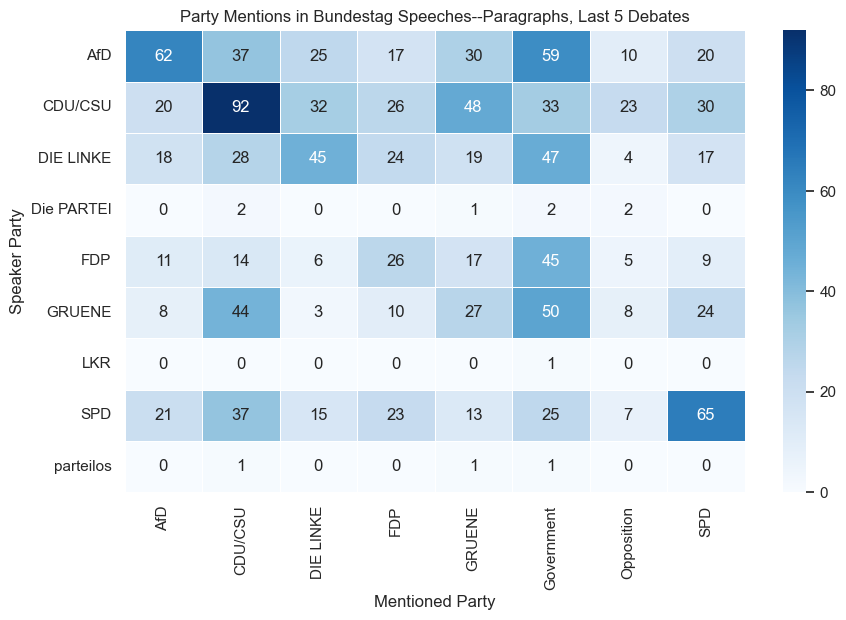

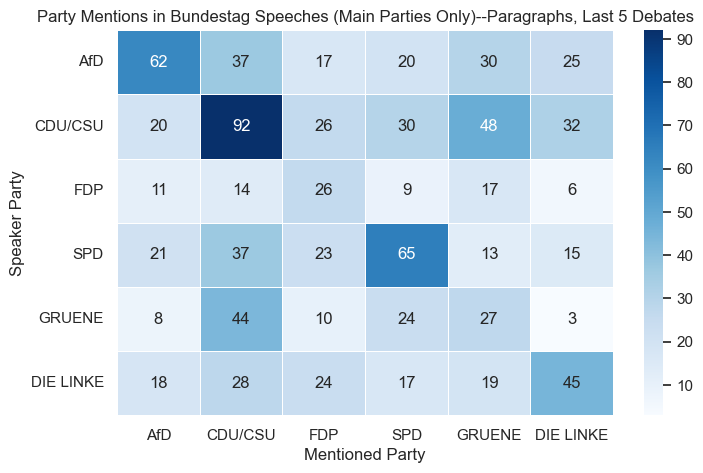

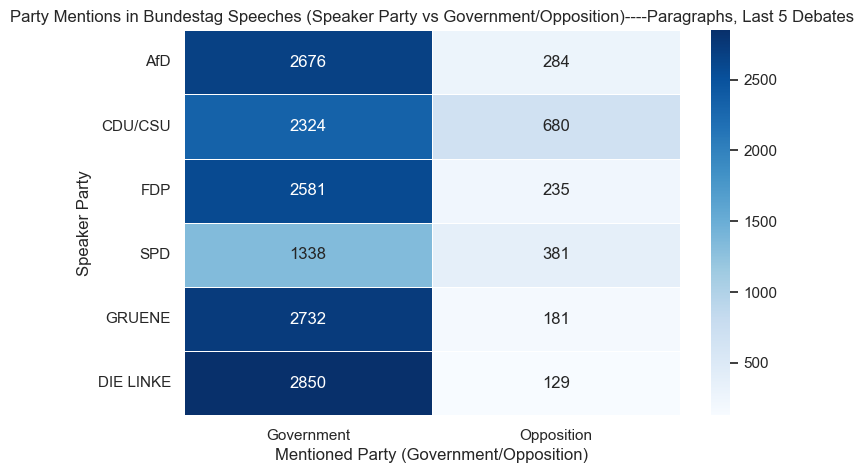

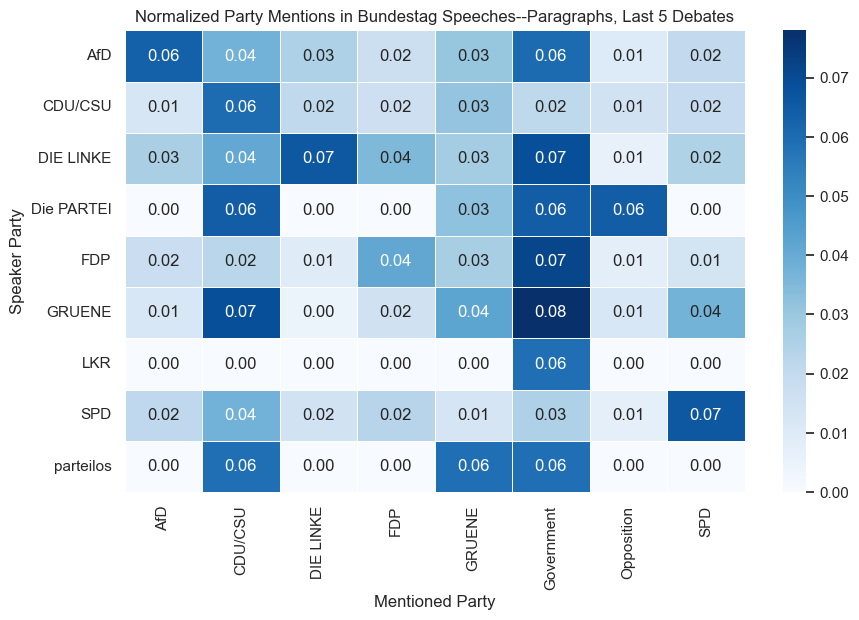

Party
CDU/CSU       1538
SPD            987
AfD            980
DIE LINKE      683
GRUENE         641
FDP            629
Die PARTEI      31
parteilos       17
LKR             17
Name: count, dtype: int64


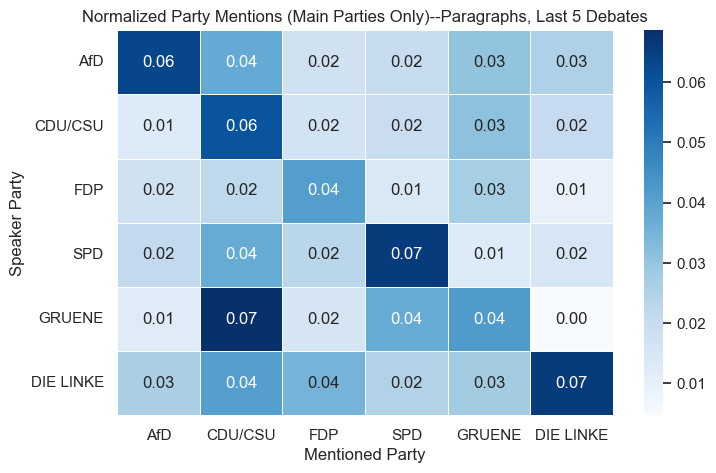

In [75]:
five_paragraphs_exploded = five_paragraphs.explode("Mentioned parties")

mention_counts_five_paragraphs = five_paragraphs_exploded.groupby(["Party", "Mentioned parties"]).size().unstack(fill_value=0)

print(mention_counts_five_paragraphs )

plt.figure(figsize=(10, 6))

sns.heatmap(mention_counts_five_paragraphs, annot=True, cmap="Blues", fmt="d", linewidths=0.5)


plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Party Mentions in Bundestag Speeches--Paragraphs, Last 5 Debates")

plt.show()

main_parties = ["AfD", "CDU/CSU", "FDP", "SPD", "GRUENE", "DIE LINKE"]


mention_counts_five_paragraphs_filtered = mention_counts_five_paragraphs.loc[main_parties, main_parties]

plt.figure(figsize=(8, 5))

sns.heatmap(mention_counts_five_paragraphs_filtered, annot=True, cmap="Blues", fmt="d", linewidths=0.5)


plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Party Mentions in Bundestag Speeches (Main Parties Only)--Paragraphs, Last 5 Debates")

plt.show()

mention_counts_five_paragraphs_filtered = mention_counts_five_paragraphs.loc[main_parties, ["Government", "Opposition"]]

plt.figure(figsize=(8, 5))

sns.heatmap(mention_counts_all_paragraphs_filtered, annot=True, cmap="Blues", fmt="d", linewidths=0.5)

plt.xlabel("Mentioned Party (Government/Opposition)")
plt.ylabel("Speaker Party")
plt.title("Party Mentions in Bundestag Speeches (Speaker Party vs Government/Opposition)----Paragraphs, Last 5 Debates")

plt.show()

speaker_party_totals = five_paragraphs["Party"].value_counts()
mention_counts_five_paragraphs_norm = mention_counts_five_paragraphs.div(speaker_party_totals, axis=0)

# Plot normalized mentions
plt.figure(figsize=(10, 6))
sns.heatmap(mention_counts_five_paragraphs_norm, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Normalized Party Mentions in Bundestag Speeches--Paragraphs, Last 5 Debates")
plt.show()

# Filter normalized data for main parties only
mention_counts_five_paragraphs_norm_filtered = mention_counts_five_paragraphs_norm.loc[main_parties, main_parties]

print(speaker_party_totals)
# Plot normalized mentions (main parties only)
plt.figure(figsize=(8, 5))
sns.heatmap(mention_counts_five_paragraphs_norm_filtered, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Normalized Party Mentions (Main Parties Only)--Paragraphs, Last 5 Debates")
plt.show()

In [76]:
five_sentences = pd.read_csv('speeches_last_5_partymentions_sentence.csv')

five_sentences['Mentioned parties'] = five_sentences['Mentioned parties'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
five_sentences['Mentioned parties'] = five_sentences['Mentioned parties'].apply(
    lambda x: x if isinstance(x, list) else []
)


In [77]:
five_sentences.iloc[3356] # pantürkisch

Filename                                                           BT_19_236.xml
Period                                                                        19
Date                                                                  2021-06-24
Item                           Abgabe einer Regierungserklärung durch die Bun...
Speech #                                                                   32631
Paragraph #                                                                    4
Speaker                                                             Frauke Petry
Role                                                                          mp
Gender                                                                  weiblich
Party                                                                  parteilos
Paragraph                      Frau Merkel unterstützt mit einem weiteren Flü...
Interjection                                                               False
Interjector                 

In [78]:
five_sentences.iloc[3410] # union

Filename                                                           BT_19_236.xml
Period                                                                        19
Date                                                                  2021-06-24
Item                           Abgabe einer Regierungserklärung durch die Bun...
Speech #                                                                   32632
Paragraph #                                                                   12
Speaker                                                            Katja Leikert
Role                                                                          mp
Gender                                                                  weiblich
Party                                                                    CDU/CSU
Paragraph                      Liebe Kolleginnen und Kollegen, ich bin da seh...
Interjection                                                               False
Interjector                 

In [79]:
if isinstance(five_sentences.at[3356, "Mentioned parties"], list):
    five_sentences.at[3356, "Mentioned parties"] = [
        party for party in five_sentences.at[3356, "Mentioned parties"] if party != "CDU/CSU"
    ]

if isinstance(five_sentences.at[3410, "Mentioned parties"], list):
    five_sentences.at[3410, "Mentioned parties"] = [
        party for party in five_sentences.at[3410, "Mentioned parties"] if party != "CDU/CSU"
    ]

Mentioned parties  AfD  CDU/CSU  DIE LINKE  FDP  GRUENE  Government  \
Party                                                                 
AfD                 64       41         29   18      37          66   
CDU/CSU             20       95         34   27      48          34   
DIE LINKE           23       34         49   24      19          51   
Die PARTEI           0        2          0    0       1           2   
FDP                 12       16          6   26      18          51   
GRUENE               8       47          3   11      27          53   
LKR                  0        0          0    0       0           1   
SPD                 22       41         16   27      15          27   
parteilos            0        1          0    0       1           1   

Mentioned parties  Opposition  SPD  
Party                               
AfD                        11   21  
CDU/CSU                    24   31  
DIE LINKE                   4   18  
Die PARTEI                  3    

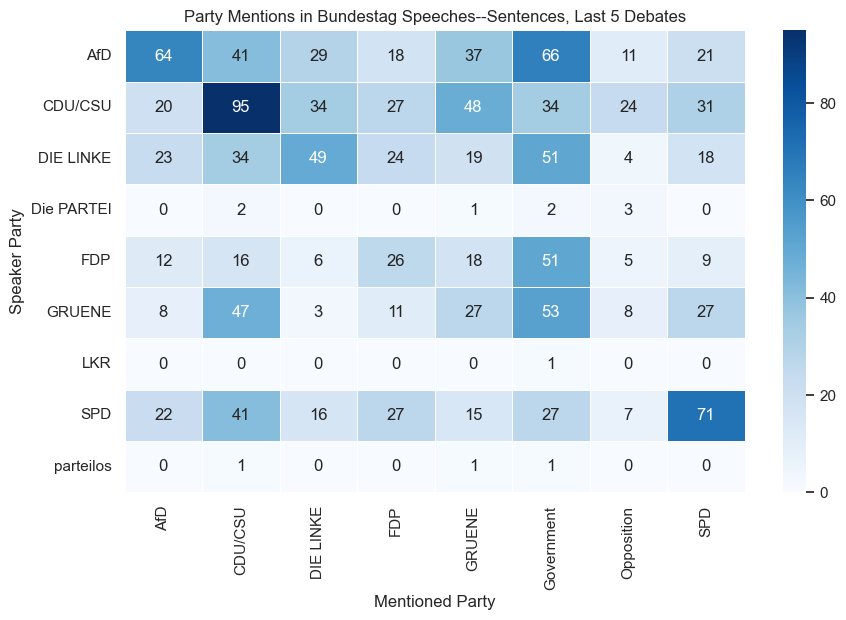

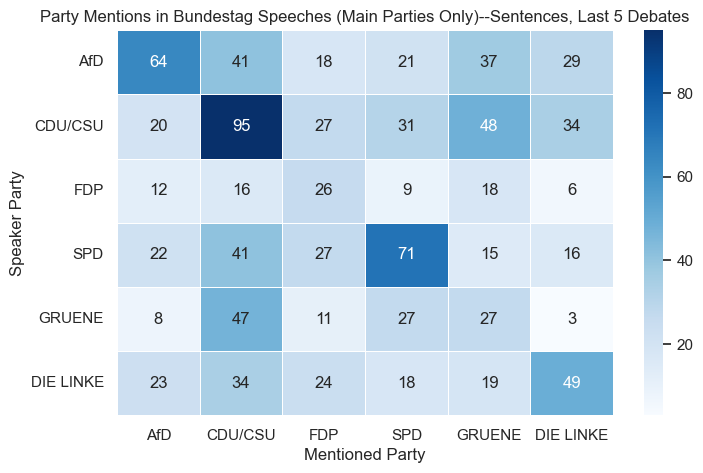

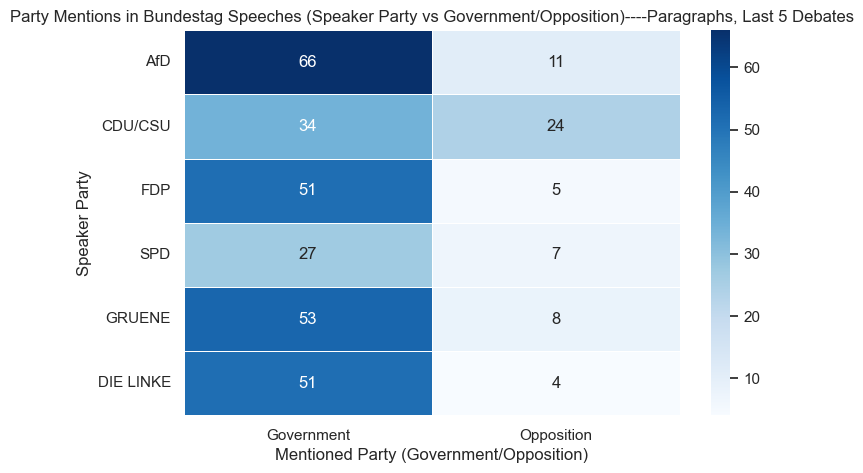

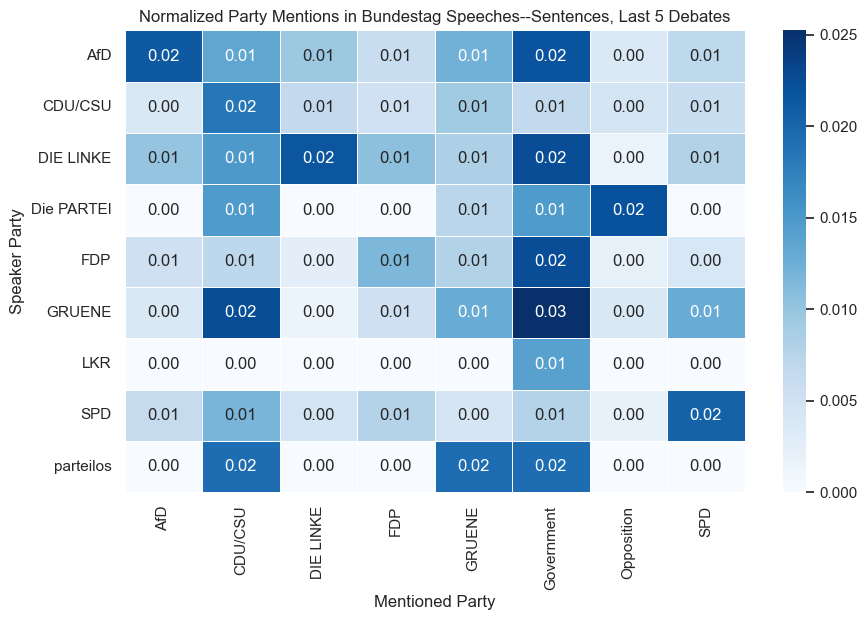

Party
CDU/CSU       5204
SPD           3488
AfD           3016
DIE LINKE     2272
FDP           2270
GRUENE        2100
Die PARTEI     136
LKR             71
parteilos       52
Name: count, dtype: int64


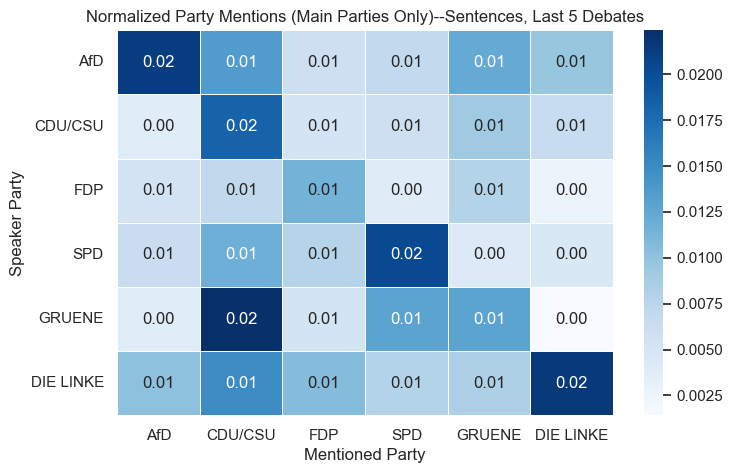

In [80]:


five_sentences_exploded = five_sentences.explode("Mentioned parties")
mention_counts_five_sentences = five_sentences_exploded.groupby(["Party", "Mentioned parties"]).size().unstack(fill_value=0)



print(mention_counts_five_sentences)

plt.figure(figsize=(10, 6))

sns.heatmap(mention_counts_five_sentences, annot=True, cmap="Blues", fmt="d", linewidths=0.5)


plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Party Mentions in Bundestag Speeches--Sentences, Last 5 Debates")

plt.show()

mention_counts_five_sentences_filtered = mention_counts_five_sentences.loc[main_parties, main_parties]

plt.figure(figsize=(8, 5))

sns.heatmap(mention_counts_five_sentences_filtered, annot=True, cmap="Blues", fmt="d", linewidths=0.5)


plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Party Mentions in Bundestag Speeches (Main Parties Only)--Sentences, Last 5 Debates")

plt.show()

mention_counts_five_sentences_filtered = mention_counts_five_sentences.loc[main_parties, ["Government", "Opposition"]]

plt.figure(figsize=(8, 5))

sns.heatmap(mention_counts_five_sentences_filtered, annot=True, cmap="Blues", fmt="d", linewidths=0.5)

plt.xlabel("Mentioned Party (Government/Opposition)")
plt.ylabel("Speaker Party")
plt.title("Party Mentions in Bundestag Speeches (Speaker Party vs Government/Opposition)----Paragraphs, Last 5 Debates")

plt.show()


speaker_party_totals = five_sentences["Party"].value_counts()
mention_counts_five_sentences_norm = mention_counts_five_sentences.div(speaker_party_totals, axis=0)

# Plot normalized mentions
plt.figure(figsize=(10, 6))
sns.heatmap(mention_counts_five_sentences_norm, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Normalized Party Mentions in Bundestag Speeches--Sentences, Last 5 Debates")
plt.show()

# Filter normalized data for main parties only
mention_counts_five_sentences_norm_filtered = mention_counts_five_sentences_norm.loc[main_parties, main_parties]

print(speaker_party_totals)
# Plot normalized mentions (main parties only)
plt.figure(figsize=(8, 5))
sns.heatmap(mention_counts_five_sentences_norm_filtered, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.xlabel("Mentioned Party")
plt.ylabel("Speaker Party")
plt.title("Normalized Party Mentions (Main Parties Only)--Sentences, Last 5 Debates")
plt.show()

Party mentions followed by verbal/nonverbal interjection

ALL DEBATES---PARAGRAPHS

In [81]:
all_paragraphs_parties = all_paragraphs.copy()

all_paragraphs_parties["Mentioned parties"] = all_paragraphs_parties["Mentioned parties"].apply(
    lambda x: [party for party in x if party not in ["Government", "Opposition"]]
)

five_paragraphs_parties = five_paragraphs.copy()

five_paragraphs_parties["Mentioned parties"] = five_paragraphs_parties["Mentioned parties"].apply(
    lambda x: [party for party in x if party not in ["Government", "Opposition"]]
)

five_sentences_parties = five_sentences.copy()

five_sentences_parties["Mentioned parties"] = five_sentences_parties["Mentioned parties"].apply(
    lambda x: [party for party in x if party not in ["Government", "Opposition"]]
)

In [82]:
five_paragraphs_parties

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Paragraph,Interjection,next_verbal_interjection,next_nonverbal_interjection,next_interjections,Speaker Paragraph,Mentioned parties
0,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32489,1,Aydan Özoğuz,mp,weiblich,SPD,Sehr geehrter Herr Präsident! Liebe Kolleginne...,False,False,False,NaN,NaN,[]
1,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32489,2,Aydan Özoğuz,mp,weiblich,SPD,Für unsere Bundeswehr schließt sich zunächst e...,False,False,False,NaN,NaN,[]
2,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32489,3,Aydan Özoğuz,mp,weiblich,SPD,59 Soldaten haben wir dort verloren. 59 Famili...,False,False,True,"[('Nonverbal', 'all', 'SPD', 'Beifall', nan), ...",NaN,[]
3,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32489,4,Aydan Özoğuz,mp,weiblich,SPD,Was bleibt nun nach 20 Jahren Bündnissolidarit...,False,False,False,NaN,NaN,[]
4,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32489,5,Aydan Özoğuz,mp,weiblich,SPD,Auch wenn es für uns schwer nachvollziehbar is...,False,False,False,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33060,3,Florian Toncar,mp,männlich,FDP,Dennoch besteht nicht allzu viel Grund zum Sel...,False,False,True,"[('Nonverbal', 'all', 'FDP', 'Beifall', nan)]",NaN,[]
5519,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33060,4,Florian Toncar,mp,männlich,FDP,"Der andere Grund, warum ich vor zu viel Euphor...",False,False,False,NaN,NaN,[]
5520,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33060,5,Florian Toncar,mp,männlich,FDP,"Wenn man sich anschaut, wie dieses Gesetz zust...",False,False,True,"[('Nonverbal', 'all', 'FDP', 'Beifall', nan)]",NaN,[]
5521,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33060,6,Florian Toncar,mp,männlich,FDP,"Wir brauchen eine andere Mentalität, einen and...",False,False,False,NaN,NaN,[]


In [83]:
def analyze_party_mentions(df, dataset_name):
    parties_mentioned = df[df['Mentioned parties'].apply(bool)]
    not_parties_mentioned = df[~df['Mentioned parties'].apply(bool)]

    parties_mentioned_not = parties_mentioned[
        (parties_mentioned['next_verbal_interjection'] == False) &
        (parties_mentioned['next_nonverbal_interjection'] == False)]

    parties_mentioned_int = parties_mentioned[
        (parties_mentioned['next_verbal_interjection'] == True) |
        (parties_mentioned['next_nonverbal_interjection'] == True)]

    parties_mentioned_verbal = parties_mentioned[
        parties_mentioned['next_verbal_interjection'] == True]

    parties_mentioned_nonverbal = parties_mentioned[
        parties_mentioned['next_nonverbal_interjection'] == True]

    not_parties_mentioned_not = not_parties_mentioned[
        (not_parties_mentioned['next_verbal_interjection'] == False) &
        (not_parties_mentioned['next_nonverbal_interjection'] == False)]

    not_parties_mentioned_int = not_parties_mentioned[
        (not_parties_mentioned['next_verbal_interjection'] == True) |
        (not_parties_mentioned['next_nonverbal_interjection'] == True)]

    not_parties_mentioned_verbal = not_parties_mentioned[
        not_parties_mentioned['next_verbal_interjection'] == True]

    not_parties_mentioned_nonverbal = not_parties_mentioned[
        not_parties_mentioned['next_nonverbal_interjection'] == True]

    print(f"Dataset: {dataset_name}\n")
    print(f"Percentage of paragraphs that mention parties not followed by interjection: {len(parties_mentioned_not)/len(parties_mentioned)*100:.2f}%")
    print(f"Percentage of paragraphs that mention parties followed by interjection: {len(parties_mentioned_int)/len(parties_mentioned)*100:.2f}%")
    print(f"Percentage of paragraphs that mention parties followed by a verbal interjection: {len(parties_mentioned_verbal)/len(parties_mentioned)*100:.2f}%")
    print(f"Percentage of paragraphs that mention parties followed by a nonverbal interjection: {len(parties_mentioned_nonverbal)/len(parties_mentioned)*100:.2f}%\n")

    print(f"Percentage of paragraphs that do not mention parties not followed by interjection: {len(not_parties_mentioned_not)/len(not_parties_mentioned)*100:.2f}%")
    print(f"Percentage of paragraphs that do not mention parties followed by interjection: {len(not_parties_mentioned_int)/len(not_parties_mentioned)*100:.2f}%")
    print(f"Percentage of paragraphs that do not mention parties followed by a verbal interjection: {len(not_parties_mentioned_verbal)/len(not_parties_mentioned)*100:.2f}%")
    print(f"Percentage of paragraphs that do not mention parties followed by a nonverbal interjection: {len(not_parties_mentioned_nonverbal)/len(not_parties_mentioned)*100:.2f}%\n")

analyze_party_mentions(all_paragraphs_parties, "All Paragraphs")
analyze_party_mentions(five_paragraphs_parties, "Last 5 Debates Paragraphs")
analyze_party_mentions(five_sentences_parties, "Last 5 Debates Sentences")

Dataset: All Paragraphs

Percentage of paragraphs that mention parties not followed by interjection: 31.78%
Percentage of paragraphs that mention parties followed by interjection: 68.22%
Percentage of paragraphs that mention parties followed by a verbal interjection: 33.77%
Percentage of paragraphs that mention parties followed by a nonverbal interjection: 44.56%

Percentage of paragraphs that do not mention parties not followed by interjection: 42.57%
Percentage of paragraphs that do not mention parties followed by interjection: 57.43%
Percentage of paragraphs that do not mention parties followed by a verbal interjection: 24.30%
Percentage of paragraphs that do not mention parties followed by a nonverbal interjection: 39.57%

Dataset: Last 5 Debates Paragraphs

Percentage of paragraphs that mention parties not followed by interjection: 33.63%
Percentage of paragraphs that mention parties followed by interjection: 66.37%
Percentage of paragraphs that mention parties followed by a verba

In [84]:
def analyze_interjections(df, dataset_name):
    followed_by_int = df[
        (df['next_verbal_interjection'] == True) |
        (df['next_nonverbal_interjection'] == True)
    ]

    followed_by_int_mention = followed_by_int[
        followed_by_int['Mentioned parties'].apply(lambda x: bool(x))
    ]

    followed_by_int_no_mention = followed_by_int[
        followed_by_int['Mentioned parties'].apply(lambda x: not bool(x))
    ]

    not_followed_by_int = df[
        (df['next_verbal_interjection'] == False) &
        (df['next_nonverbal_interjection'] == False)
    ]

    not_followed_by_int_mention = not_followed_by_int[
        not_followed_by_int['Mentioned parties'].apply(lambda x: bool(x))
    ]

    not_followed_by_int_no_mention = not_followed_by_int[
        not_followed_by_int['Mentioned parties'].apply(lambda x: not bool(x))
    ]

    print(f"Dataset: {dataset_name}")
    print(f"Percentage followed by an interjection that mention a party: "
          f"{len(followed_by_int_mention) / len(followed_by_int) * 100:.2f}%")
    print(f"Percentage followed by an interjection that do NOT mention a party: "
          f"{len(followed_by_int_no_mention) / len(followed_by_int) * 100:.2f}%")
    print("\n")
    print(f"Percentage NOT followed by an interjection that mention a party: "
          f"{len(not_followed_by_int_mention) / len(not_followed_by_int) * 100:.2f}%")
    print(f"Percentage NOT followed by an interjection that do NOT mention a party: "
          f"{len(not_followed_by_int_no_mention) / len(not_followed_by_int) * 100:.2f}%")
    print("--------------------------------------------------")

analyze_interjections(all_paragraphs_parties, "All Paragraphs")
analyze_interjections(five_paragraphs_parties, "Last 5 Debates Paragraphs")
analyze_interjections(five_sentences_parties, "Last 5 Debates Sentences")


Dataset: All Paragraphs
Percentage followed by an interjection that mention a party: 15.62%
Percentage followed by an interjection that do NOT mention a party: 84.38%


Percentage NOT followed by an interjection that mention a party: 10.42%
Percentage NOT followed by an interjection that do NOT mention a party: 89.58%
--------------------------------------------------
Dataset: Last 5 Debates Paragraphs
Percentage followed by an interjection that mention a party: 16.91%
Percentage followed by an interjection that do NOT mention a party: 83.09%


Percentage NOT followed by an interjection that mention a party: 10.90%
Percentage NOT followed by an interjection that do NOT mention a party: 89.10%
--------------------------------------------------
Dataset: Last 5 Debates Sentences
Percentage followed by an interjection that mention a party: 9.55%
Percentage followed by an interjection that do NOT mention a party: 90.45%


Percentage NOT followed by an interjection that mention a party: 3.96

In [85]:
'''text_parties_mentioned = last_5_paragraphs_parties[last_5_paragraphs_parties['Mentioned parties'].apply(lambda x: bool(x))]

not_text_parties_mentioned = last_5_paragraphs_parties[
    last_5_paragraphs_parties['Mentioned parties'].apply(lambda x: not bool(x))
]


text_parties_mentioned = last_5_paragraphs_parties[
    text_speeches_parties['Mentioned parties'].apply(lambda x: bool(x))
]
not_text_parties_mentioned = text_speeches_parties[
    text_speeches_parties['Mentioned parties'].apply(lambda x: not bool(x) or all(party in ["Government", "Opposition"] for party in x))
]


text_parties_mentioned_not = text_parties_mentioned[
    (text_parties_mentioned['next_verbal_interjection'] == False) &
    (text_parties_mentioned['next_nonverbal_interjection'] == False)]

text_parties_mentioned_int = text_parties_mentioned[
    (text_parties_mentioned['next_verbal_interjection'] == True) |
    (text_parties_mentioned['next_nonverbal_interjection'] == True)]

text_parties_mentioned_verbal = text_parties_mentioned[
    (text_parties_mentioned['next_verbal_interjection'] == True)]

text_parties_mentioned_nonverbal = text_parties_mentioned[
    (text_parties_mentioned['next_nonverbal_interjection'] == True)]

not_text_parties_mentioned_not = not_text_parties_mentioned[
    (not_text_parties_mentioned['next_verbal_interjection'] == False) &
    (not_text_parties_mentioned['next_nonverbal_interjection'] == False)]

not_text_parties_mentioned_int = not_text_parties_mentioned[
    (not_text_parties_mentioned['next_verbal_interjection'] == True) |
    (not_text_parties_mentioned['next_nonverbal_interjection'] == True)]

not_text_parties_mentioned_verbal = not_text_parties_mentioned[
    (not_text_parties_mentioned['next_verbal_interjection'] == True)]

not_text_parties_mentioned_nonverbal = not_text_parties_mentioned[
    (not_text_parties_mentioned['next_nonverbal_interjection'] == True)]

print(f"Percentage of paragraphs that mention parties not followed by interjection: {len(text_parties_mentioned_not)/len(text_parties_mentioned)*100:.2f}%")
print(f"Percentage of paragraphs that mention parties followed by interjection: {len(text_parties_mentioned_int)/len(text_parties_mentioned)*100:.2f}")
print(f"Percentage of paragraphs that mention parties followed by a verbal interjection: {len(text_parties_mentioned_verbal)/len(text_parties_mentioned)*100:.2f}")
print(f"Percentage of paragraphs that mention parties followed by a nonverbal interjection: {len(text_parties_mentioned_nonverbal)/len(text_parties_mentioned)*100:.2f} \n \n ")

print(f"Percentage of paragraphs that do not mention parties not followed by interjection: {len(not_text_parties_mentioned_not)/len(not_text_parties_mentioned)*100:.2f}%")
print(f"Percentage of paragraphs that do not mention parties followed by interjection: {len(not_text_parties_mentioned_int)/len(not_text_parties_mentioned)*100:.2f}")
print(f"Percentage of paragraphs that do not mention parties followed by a verbal interjection: {len(not_text_parties_mentioned_verbal)/len(not_text_parties_mentioned)*100:.2f}")
print(f"Percentage of paragraphs that do not mention parties followed by a nonverbal interjection: {len(not_text_parties_mentioned_nonverbal)/len(not_text_parties_mentioned)*100:.2f}")'''

'text_parties_mentioned = last_5_paragraphs_parties[last_5_paragraphs_parties[\'Mentioned parties\'].apply(lambda x: bool(x))]\n\nnot_text_parties_mentioned = last_5_paragraphs_parties[\n    last_5_paragraphs_parties[\'Mentioned parties\'].apply(lambda x: not bool(x))\n]\n\n\ntext_parties_mentioned = last_5_paragraphs_parties[\n    text_speeches_parties[\'Mentioned parties\'].apply(lambda x: bool(x))\n]\nnot_text_parties_mentioned = text_speeches_parties[\n    text_speeches_parties[\'Mentioned parties\'].apply(lambda x: not bool(x) or all(party in ["Government", "Opposition"] for party in x))\n]\n\n\ntext_parties_mentioned_not = text_parties_mentioned[\n    (text_parties_mentioned[\'next_verbal_interjection\'] == False) &\n    (text_parties_mentioned[\'next_nonverbal_interjection\'] == False)]\n\ntext_parties_mentioned_int = text_parties_mentioned[\n    (text_parties_mentioned[\'next_verbal_interjection\'] == True) |\n    (text_parties_mentioned[\'next_nonverbal_interjection\'] == True

In [86]:
'''text_parties_mentioned = last_5_sentences_parties[
    last_5_sentences_parties['Mentioned parties'].apply(lambda x: bool(x))
]
not_text_parties_mentioned = last_5_sentences_parties[
    last_5_sentences_parties['Mentioned parties'].apply(lambda x: not bool(x))
]


text_parties_mentioned_not = text_parties_mentioned[
    (text_parties_mentioned['next_verbal_interjection'] == False) &
    (text_parties_mentioned['next_nonverbal_interjection'] == False)]

text_parties_mentioned_int = text_parties_mentioned[
    (text_parties_mentioned['next_verbal_interjection'] == True) |
    (text_parties_mentioned['next_nonverbal_interjection'] == True)]

text_parties_mentioned_verbal = text_parties_mentioned[
    (text_parties_mentioned['next_verbal_interjection'] == True)]

text_parties_mentioned_nonverbal = text_parties_mentioned[
    (text_parties_mentioned['next_nonverbal_interjection'] == True)]

not_text_parties_mentioned_not = not_text_parties_mentioned[
    (not_text_parties_mentioned['next_verbal_interjection'] == False) &
    (not_text_parties_mentioned['next_nonverbal_interjection'] == False)]

not_text_parties_mentioned_int = not_text_parties_mentioned[
    (not_text_parties_mentioned['next_verbal_interjection'] == True) |
    (not_text_parties_mentioned['next_nonverbal_interjection'] == True)]

not_text_parties_mentioned_verbal = not_text_parties_mentioned[
    (not_text_parties_mentioned['next_verbal_interjection'] == True)]

not_text_parties_mentioned_nonverbal = not_text_parties_mentioned[
    (not_text_parties_mentioned['next_nonverbal_interjection'] == True)]

print(f"Percentage of sentences that mention parties not followed by interjection: {len(text_parties_mentioned_not)/len(text_parties_mentioned)*100:.2f}%")
print(f"Percentage of sentences that mention parties followed by interjection: {len(text_parties_mentioned_int)/len(text_parties_mentioned)*100:.2f}")
print(f"Percentage of sentences that mention parties followed by a verbal interjection: {len(text_parties_mentioned_verbal)/len(text_parties_mentioned)*100:.2f}")
print(f"Percentage of sentences that mention parties followed by a nonverbal interjection: {len(text_parties_mentioned_nonverbal)/len(text_parties_mentioned)*100:.2f} \n \n ")

print(f"Percentage of sentences that do not mention parties not followed by interjection: {len(not_text_parties_mentioned_not)/len(not_text_parties_mentioned)*100:.2f}%")
print(f"Percentage of sentences that do not mention parties followed by interjection: {len(not_text_parties_mentioned_int)/len(not_text_parties_mentioned)*100:.2f}")
print(f"Percentage of sentences that do not mention parties followed by a verbal interjection: {len(not_text_parties_mentioned_verbal)/len(not_text_parties_mentioned)*100:.2f}")
print(f"Percentage of sentences that do not mention parties followed by a nonverbal interjection: {len(not_text_parties_mentioned_nonverbal)/len(not_text_parties_mentioned)*100:.2f}")'''

'text_parties_mentioned = last_5_sentences_parties[\n    last_5_sentences_parties[\'Mentioned parties\'].apply(lambda x: bool(x))\n]\nnot_text_parties_mentioned = last_5_sentences_parties[\n    last_5_sentences_parties[\'Mentioned parties\'].apply(lambda x: not bool(x))\n]\n\n\ntext_parties_mentioned_not = text_parties_mentioned[\n    (text_parties_mentioned[\'next_verbal_interjection\'] == False) &\n    (text_parties_mentioned[\'next_nonverbal_interjection\'] == False)]\n\ntext_parties_mentioned_int = text_parties_mentioned[\n    (text_parties_mentioned[\'next_verbal_interjection\'] == True) |\n    (text_parties_mentioned[\'next_nonverbal_interjection\'] == True)]\n\ntext_parties_mentioned_verbal = text_parties_mentioned[\n    (text_parties_mentioned[\'next_verbal_interjection\'] == True)]\n\ntext_parties_mentioned_nonverbal = text_parties_mentioned[\n    (text_parties_mentioned[\'next_nonverbal_interjection\'] == True)]\n\nnot_text_parties_mentioned_not = not_text_parties_mentioned[\

In [87]:
'''# All sentences followed by an interjection
sentences_followed_by_int = last_5_sentences_parties[
    (last_5_sentences_parties['next_verbal_interjection'] == True) |
    (last_5_sentences_parties['next_nonverbal_interjection'] == True)
]

# Among them, those that mention a party
sentences_followed_by_int_mention = sentences_followed_by_int[
    sentences_followed_by_int['Mentioned parties'].apply(lambda x: bool(x))
]

# Among them, those that do NOT mention a party
sentences_followed_by_int_no_mention = sentences_followed_by_int[
    sentences_followed_by_int['Mentioned parties'].apply(lambda x: not bool(x))
]

# Calculate percentages
print(f"Percentage of sentences followed by an interjection that mention a party: {len(sentences_followed_by_int_mention) / len(sentences_followed_by_int) * 100:.2f}%")
print(f"Percentage of sentences followed by an interjection that do NOT mention a party: {len(sentences_followed_by_int_no_mention) / len(sentences_followed_by_int) * 100:.2f}%")
'''

'# All sentences followed by an interjection\nsentences_followed_by_int = last_5_sentences_parties[\n    (last_5_sentences_parties[\'next_verbal_interjection\'] == True) |\n    (last_5_sentences_parties[\'next_nonverbal_interjection\'] == True)\n]\n\n# Among them, those that mention a party\nsentences_followed_by_int_mention = sentences_followed_by_int[\n    sentences_followed_by_int[\'Mentioned parties\'].apply(lambda x: bool(x))\n]\n\n# Among them, those that do NOT mention a party\nsentences_followed_by_int_no_mention = sentences_followed_by_int[\n    sentences_followed_by_int[\'Mentioned parties\'].apply(lambda x: not bool(x))\n]\n\n# Calculate percentages\nprint(f"Percentage of sentences followed by an interjection that mention a party: {len(sentences_followed_by_int_mention) / len(sentences_followed_by_int) * 100:.2f}%")\nprint(f"Percentage of sentences followed by an interjection that do NOT mention a party: {len(sentences_followed_by_int_no_mention) / len(sentences_followed_by_

In [88]:
'''# All sentences followed by an interjection
sentences_not_followed_by_int = last_5_sentences_parties[
    (last_5_sentences_parties['next_verbal_interjection'] == False) &
    (last_5_sentences_parties['next_nonverbal_interjection'] == False)
]

# Among them, those that mention a party
sentences_not_followed_by_int_mention = sentences_not_followed_by_int[
    sentences_not_followed_by_int['Mentioned parties'].apply(lambda x: bool(x))
]

# Among them, those that do NOT mention a party
sentences_not_followed_by_int_no_mention = sentences_not_followed_by_int[
    sentences_not_followed_by_int['Mentioned parties'].apply(lambda x: not bool(x))
]

# Calculate percentages
print(f"Percentage of sentences not followed by an interjection that mention a party: {len(sentences_not_followed_by_int_mention) / len(sentences_not_followed_by_int ) * 100:.2f}%")
print(f"Percentage of sentences not followed by an interjection that do NOT mention a party: {len(sentences_not_followed_by_int_no_mention) / len(sentences_not_followed_by_int) * 100:.2f}%")'''

'# All sentences followed by an interjection\nsentences_not_followed_by_int = last_5_sentences_parties[\n    (last_5_sentences_parties[\'next_verbal_interjection\'] == False) &\n    (last_5_sentences_parties[\'next_nonverbal_interjection\'] == False)\n]\n\n# Among them, those that mention a party\nsentences_not_followed_by_int_mention = sentences_not_followed_by_int[\n    sentences_not_followed_by_int[\'Mentioned parties\'].apply(lambda x: bool(x))\n]\n\n# Among them, those that do NOT mention a party\nsentences_not_followed_by_int_no_mention = sentences_not_followed_by_int[\n    sentences_not_followed_by_int[\'Mentioned parties\'].apply(lambda x: not bool(x))\n]\n\n# Calculate percentages\nprint(f"Percentage of sentences not followed by an interjection that mention a party: {len(sentences_not_followed_by_int_mention) / len(sentences_not_followed_by_int ) * 100:.2f}%")\nprint(f"Percentage of sentences not followed by an interjection that do NOT mention a party: {len(sentences_not_follo

--> Mentioning a party increases the likelihood of an interjection, but most interjections still occur in response to sentences without party mentions.

What party was mentioned?

SENTENCE

In [89]:
five_sentences_parties = five_sentences_parties[five_sentences_parties['Mentioned parties'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

five_sentences_parties_mentioned_same = five_sentences_parties[
    five_sentences_parties.apply(lambda row: row['Mentioned parties'] == [row['Party']], axis=1)
]

five_sentences_parties_mentioned_other = five_sentences_parties[
    five_sentences_parties.apply(lambda row: all(party != row['Party'] for party in row['Mentioned parties']), axis=1)
]


five_sentences_parties_mentioned_same_and_other = five_sentences_parties[
    five_sentences_parties.apply(lambda row: row['Party'] in row['Mentioned parties'] and len(set(row['Mentioned parties'])) > 1, axis=1)
]


In [90]:
five_sentences_parties
# should be 739

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,next_nonverbal_interjection,next_interjectors,next_interjections,Speaker Paragraph,Speech,Sentences,prev_sentence,next_sentence,is_last_sentence,Mentioned parties
276,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32497,6,Rüdiger Lucassen,mp,männlich,AfD,...,True,[],"[('Nonverbal', 'all', 'all', 'Heiterkeit', nan...",NaN,Herr Präsident! Meine Damen und Herren! Was di...,In Wahrheit ist die Außenpolitik Deutschlands ...,denn die Ziele der Außenminister Frank-Walter ...,"Dort weiß man, wie man auf der richtigen Seite...",True,[SPD]
344,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32499,10,Johann David Wadephul,mp,männlich,CDU/CSU,...,False,[],NaN,NaN,Herr Präsident! Liebe Kolleginnen und Kollegen...,Ich bin den Koalitionsfraktionen und insbesond...,"Ich finde, das sollte auch eine dauerhafte Leh...","Wir haben den Amerikanern damit ermöglicht, di...",False,[SPD]
437,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32501,14,Henning Otte,mp,männlich,CDU/CSU,...,False,[],NaN,NaN,Sehr geehrter Herr Präsident! Meine sehr vereh...,Im Namen der CDU/CSU-Bundestagsfraktion danke ...,Das ist die Bundeswehr.,Herzlichen Dank.,True,[CDU/CSU]
497,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32503,1,Gisela Manderla,mp,weiblich,CDU/CSU,...,False,[],NaN,NaN,Herr Präsident! Frau Bundeskanzlerin! Liebe So...,"Lieber Herr Matschie, ich kann mich den Worten...",Liebe Kolleginnen und Kollegen!,Der Abzug der internationalen Truppen aus Afgh...,True,[CDU/CSU]
612,BT_19_235.xml,19,2021-06-23,Befragung der Bundesregierung,32511,2,Carsten Schneider,mp,männlich,SPD,...,False,[],NaN,NaN,"Frau Bundeskanzlerin, Sie haben ja eben auf de...",Nun habe ich von den beiden Parteivorsitzenden...,es gibt einen erheblichen Konsolidierungsbedarf.,"Nehmen Sie es mir nicht übel, aber ich interpr...",False,[CDU/CSU]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18542,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,True,[],"[('Nonverbal', 'all', 'SPD', 'Beifall', nan), ...",NaN,Frau Präsidentin! Meine sehr verehrten Kollegi...,Deshalb sind wir als SPD-Bundestagsfraktion un...,"– Wir wollen, dass die Menschen in unserem Lan...",Dieser Rechtsanspruch ist für uns auch ein wic...,True,[SPD]
18561,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33058,1,Gesine Lötzsch,mp,weiblich,DIE LINKE,...,False,[],NaN,NaN,Vielen Dank. – Frau Präsidentin! Meine sehr ge...,Um es gleich vorwegzunehmen: Wir als Linke wer...,Meine sehr geehrten Damen und Herren!,Als wir hier im Bundestag den Gesetzentwurf di...,False,[DIE LINKE]
18564,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33058,1,Gesine Lötzsch,mp,weiblich,DIE LINKE,...,True,[],"[('Nonverbal', 'all', 'DIE LINKE', 'Beifall', ...",NaN,Vielen Dank. – Frau Präsidentin! Meine sehr ge...,"Wir als Linke stehen dafür, dass alle Kinder g...",Nun gab es ja im Vermittlungsausschuss die Deb...,"An dieser Stelle will ich auch erwähnen, dass ...",True,[DIE LINKE]
18567,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33058,3,Gesine Lötzsch,mp,weiblich,DIE LINKE,...,False,[],NaN,NaN,Vielen Dank. – Frau Präsidentin! Meine sehr ge...,Wir brauchen nämlich eine Gemeinschaftsaufgabe...,"Aber: Ich glaube, dass uns diese ganze Diskuss...",Das werden wir auch in der nächsten Legislatur...,False,[DIE LINKE]


In [91]:
five_sentences_parties_mentioned_same
# should be 227

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,next_nonverbal_interjection,next_interjectors,next_interjections,Speaker Paragraph,Speech,Sentences,prev_sentence,next_sentence,is_last_sentence,Mentioned parties
437,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32501,14,Henning Otte,mp,männlich,CDU/CSU,...,False,[],NaN,NaN,Sehr geehrter Herr Präsident! Meine sehr vereh...,Im Namen der CDU/CSU-Bundestagsfraktion danke ...,Das ist die Bundeswehr.,Herzlichen Dank.,True,[CDU/CSU]
497,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32503,1,Gisela Manderla,mp,weiblich,CDU/CSU,...,False,[],NaN,NaN,Herr Präsident! Frau Bundeskanzlerin! Liebe So...,"Lieber Herr Matschie, ich kann mich den Worten...",Liebe Kolleginnen und Kollegen!,Der Abzug der internationalen Truppen aus Afgh...,True,[CDU/CSU]
699,BT_19_235.xml,19,2021-06-23,Befragung der Bundesregierung,32526,2,Katja Mast,mp,weiblich,SPD,...,False,[],NaN,NaN,"Vielen Dank, Frau Präsidentin. – Frau Bundeska...",Mit der Bitte um eine klare Antwort: Sind Sie ...,Das müssen wir aus unserer Sicht stärken.,NaN,True,[SPD]
710,BT_19_235.xml,19,2021-06-23,Befragung der Bundesregierung,32527,4,Katja Mast,mp,weiblich,SPD,...,True,[],"[('Nonverbal', 'all', 'SPD', 'Beifall', nan)]",NaN,"Danke, Frau Bundeskanzlerin, für Ihre Antwort ...",Wir von der SPD lehnen dies ab.,Im CDU-Wirtschaftsministerium wird jetzt auch ...,Lehnen Sie eine weitere Erhöhung des gesetzlic...,True,[SPD]
858,BT_19_235.xml,19,2021-06-23,FragestundeDrucksache 19/30797Dr. Anton Friese...,32551,1,Stephan Brandner,mp,männlich,AfD,...,False,[],NaN,NaN,"Ja, gerne. – Also, wenn ich Sie richtig versta...","– Also, wenn ich Sie richtig verstanden habe, ...","Ja, gerne.","Ich werde versuchen, dass wir da was hinbekommen.",False,[AfD]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18530,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,9,Götz Frömming,mp,männlich,AfD,...,False,[],NaN,NaN,Sehr geehrte Frau Präsidentin! Sehr geehrter K...,"weitere werden dem folgen –, das lehnen wir al...","Meine Damen und Herren, eine weitere Aushöhlun...",Ich danke Ihnen.,True,[AfD]
18542,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,True,[],"[('Nonverbal', 'all', 'SPD', 'Beifall', nan), ...",NaN,Frau Präsidentin! Meine sehr verehrten Kollegi...,Deshalb sind wir als SPD-Bundestagsfraktion un...,"– Wir wollen, dass die Menschen in unserem Lan...",Dieser Rechtsanspruch ist für uns auch ein wic...,True,[SPD]
18561,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33058,1,Gesine Lötzsch,mp,weiblich,DIE LINKE,...,False,[],NaN,NaN,Vielen Dank. – Frau Präsidentin! Meine sehr ge...,Um es gleich vorwegzunehmen: Wir als Linke wer...,Meine sehr geehrten Damen und Herren!,Als wir hier im Bundestag den Gesetzentwurf di...,False,[DIE LINKE]
18564,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33058,1,Gesine Lötzsch,mp,weiblich,DIE LINKE,...,True,[],"[('Nonverbal', 'all', 'DIE LINKE', 'Beifall', ...",NaN,Vielen Dank. – Frau Präsidentin! Meine sehr ge...,"Wir als Linke stehen dafür, dass alle Kinder g...",Nun gab es ja im Vermittlungsausschuss die Deb...,"An dieser Stelle will ich auch erwähnen, dass ...",True,[DIE LINKE]


In [92]:
five_sentences_parties_mentioned_other
# should be 505

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,next_nonverbal_interjection,next_interjectors,next_interjections,Speaker Paragraph,Speech,Sentences,prev_sentence,next_sentence,is_last_sentence,Mentioned parties
276,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32497,6,Rüdiger Lucassen,mp,männlich,AfD,...,True,[],"[('Nonverbal', 'all', 'all', 'Heiterkeit', nan...",NaN,Herr Präsident! Meine Damen und Herren! Was di...,In Wahrheit ist die Außenpolitik Deutschlands ...,denn die Ziele der Außenminister Frank-Walter ...,"Dort weiß man, wie man auf der richtigen Seite...",True,[SPD]
344,BT_19_235.xml,19,2021-06-23,Aktuelle Stunde zum geordneten Rückzug der NAT...,32499,10,Johann David Wadephul,mp,männlich,CDU/CSU,...,False,[],NaN,NaN,Herr Präsident! Liebe Kolleginnen und Kollegen...,Ich bin den Koalitionsfraktionen und insbesond...,"Ich finde, das sollte auch eine dauerhafte Leh...","Wir haben den Amerikanern damit ermöglicht, di...",False,[SPD]
612,BT_19_235.xml,19,2021-06-23,Befragung der Bundesregierung,32511,2,Carsten Schneider,mp,männlich,SPD,...,False,[],NaN,NaN,"Frau Bundeskanzlerin, Sie haben ja eben auf de...",Nun habe ich von den beiden Parteivorsitzenden...,es gibt einen erheblichen Konsolidierungsbedarf.,"Nehmen Sie es mir nicht übel, aber ich interpr...",False,[CDU/CSU]
709,BT_19_235.xml,19,2021-06-23,Befragung der Bundesregierung,32527,4,Katja Mast,mp,weiblich,SPD,...,False,[],NaN,NaN,"Danke, Frau Bundeskanzlerin, für Ihre Antwort ...",Im CDU-Wirtschaftsministerium wird jetzt auch ...,"Handeln wir nicht politisch, wird das Rentenni...",Wir von der SPD lehnen dies ab.,False,[CDU/CSU]
712,BT_19_235.xml,19,2021-06-23,Befragung der Bundesregierung,32527,5,Katja Mast,mp,weiblich,SPD,...,False,[],NaN,NaN,"Danke, Frau Bundeskanzlerin, für Ihre Antwort ...","Und wenn ja: Wie erklären Sie sich, dass dazu ...",Lehnen Sie eine weitere Erhöhung des gesetzlic...,– Sie sind ja auch Mitglied der CDU.,False,[CDU/CSU]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18103,BT_19_239.xml,19,2021-09-07,a) Zweite und dritte Beratung des von den Frak...,33035,6,Johannes Fechner,mp,männlich,SPD,...,False,[],NaN,NaN,Nein. Wir haben hier ein hohes Niveau in der D...,"Es ist gut, dass Herr Spahn und auch die Union...","Deswegen ist es gut, dass wir heute ganz klar ...",Wir hätten das gern schon im November gemacht.,False,[CDU/CSU]
18265,BT_19_239.xml,19,2021-09-07,a) Zweite und dritte Beratung des von den Frak...,33040,6,Oliver Krischer,mp,männlich,GRUENE,...,False,[],"[('Verbal', 'Mechthild Rawert', 'SPD', 'Zuruf'...",NaN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,"Dieses Land, Deutschland, kann sich nicht läng...",Deshalb sage ich zum Schluss:,Das muss sich ändern.,True,"[CDU/CSU, SPD]"
18357,BT_19_239.xml,19,2021-09-07,a) Zweite und dritte Beratung des von den Frak...,33045,3,Martin Sichert,mp,männlich,AfD,...,False,[],NaN,NaN,"Vielen Dank, Frau Präsidentin. - Wenn alle Men...",Das sagte am 6. Juli dieses Jahres Ihr SPD-Min...,Wenn alle Menschen in Deutschland ein Impfange...,"Das Bundesgesundheitsministerium sagt, dass sc...",True,[SPD]
18359,BT_19_239.xml,19,2021-09-07,a) Zweite und dritte Beratung des von den Frak...,33045,5,Martin Sichert,mp,männlich,AfD,...,True,[],"[('Nonverbal', 'all', 'AfD', 'Beifall', nan), ...",NaN,"Vielen Dank, Frau Präsidentin. - Wenn alle Men...","Wie kann es dann sein, dass heute auf Initiati...","Das Bundesgesundheitsministerium sagt, dass sc...",NaN,True,[SPD]


In [93]:
five_sentences_parties_mentioned_same_and_other
# should be 7

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,next_nonverbal_interjection,next_interjectors,next_interjections,Speaker Paragraph,Speech,Sentences,prev_sentence,next_sentence,is_last_sentence,Mentioned parties
1904,BT_19_235.xml,19,2021-06-23,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32597,5,Christian Kühn,mp,männlich,GRUENE,...,False,[],NaN,NaN,Sehr geehrter Herr Präsident! Werte Kolleginne...,Das Prinzip der Gemeinnützigkeit wollen nun wi...,wir haben 3 Millionen seit Ende der 80er-Jahre...,"Wir wollen, dass Wohnungsunternehmen, die Wohn...",False,"[SPD, GRUENE, DIE LINKE]"
4473,BT_19_236.xml,19,2021-06-24,Beschlussempfehlung und Bericht des 1. Untersu...,32654,3,Konstantin von Notz,mp,männlich,GRUENE,...,False,[],NaN,NaN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,"Wir Fraktionen der Opposition, wir von den Grü...",Ich kann sagen:,Es sind zahlreiche neue Zusammenhänge und Fakt...,False,"[FDP, GRUENE, DIE LINKE]"
5035,BT_19_236.xml,19,2021-06-24,"Antrag der Abgeordneten Leif-Erik Holm, Steffe...",32664,11,Marcel Klinge,mp,männlich,FDP,...,False,[],NaN,NaN,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Ähnliche Entlastungsvorschläge liest man ja di...,"Auch das, meine Damen und Herren, ist längst ü...",Die Union verspricht in schöner Regelmäßigkeit...,False,"[CDU/CSU, FDP]"
5809,BT_19_236.xml,19,2021-06-24,Aktuelle Stunde auf Verlangen der Fraktion DIE...,32684,9,Tankred Schipanski,mp,männlich,CDU/CSU,...,False,[],NaN,NaN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,"Dort haben wir als Union gezeigt, wie wir uns ...","Dann, im April 2012, ein Antrag der damals sch...","Genau das ist in die Novelle eingeflossen, die...",False,"[CDU/CSU, FDP]"
6587,BT_19_236.xml,19,2021-06-24,Beschlussempfehlung und Bericht des Ausschusse...,32705,10,Mark Helfrich,mp,männlich,CDU/CSU,...,False,[],NaN,NaN,Herr Präsident! Meine sehr verehrten Damen und...,Ich möchte mich ganz herzlich bei den Berichte...,Die vielen Themen und die Länge der Verhandlun...,Und Ihnen allen danke ich für das Zuhören.,True,"[CDU/CSU, SPD]"
6970,BT_19_236.xml,19,2021-06-24,a) – Zweite und dritte Beratung des von der Bu...,32719,4,Andreas Bleck,mp,männlich,AfD,...,True,[],"[('Nonverbal', 'all', 'AfD', 'Beifall', nan)]",NaN,Werte Frau Präsidentin! Werte Kolleginnen und ...,Im Unterschied zur Union macht die AfD bei die...,denn die Grünen befinden sich auf einem ideolo...,Aus unserer Sicht möchte ich Folgendes festste...,True,"[CDU/CSU, AfD]"
7242,BT_19_236.xml,19,2021-06-24,Unterrichtung durch die Bundesregierung: Beric...,32725,8,Axel Müller,mp,männlich,CDU/CSU,...,False,[],NaN,NaN,Sehr geehrte Frau Präsidentin! Meine lieben Ko...,Diese Erkenntnis führte zu dem Antrag der Frak...,… Wir werden noch immer als Fremde im eigenen ...,Nach mehr als zwei Jahren intensiver Forschung...,True,"[CDU/CSU, SPD]"
7999,BT_19_236.xml,19,2021-06-24,"a) Antrag der Abgeordneten Stephan Brandner, D...",32746,2,Stephan Brandner,mp,männlich,AfD,...,False,[],NaN,NaN,Herr Präsident! Meine Damen und Herren! Seit e...,Die deutliche Mehrheit aller Bürger in Deutsch...,Da sich aber mittlerweile die sogenannte Zivil...,Knapp 60 Prozent der Frauen und sogar eine rel...,False,"[AfD, SPD]"
8042,BT_19_236.xml,19,2021-06-24,"a) Antrag der Abgeordneten Stephan Brandner, D...",32746,23,Stephan Brandner,mp,männlich,AfD,...,False,[],NaN,NaN,Herr Präsident! Meine Damen und Herren! Seit e...,"mit der bürgerlichen Mehrheit aus AfD, CDU und...",Gerade vorgestern hat die Gemeindevertretung B...,Machen Sie das Gleiche wie die Gemeinde Besten...,False,"[CDU/CSU, AfD]"
8622,BT_19_236.xml,19,2021-06-24,– Beschlussempfehlung und Bericht des Auswärti...,32767,2,Frank Steffel,mp,männlich,CDU/CSU,...,False,[],NaN,NaN,Frau Präsidentin! Meine sehr geehrten Damen un...,"Heute wird, wenn ich das recht überblicke, ein...","Es ist, wie Sie wissen, alles anders gekommen.","Das heißt, wir werden uns weiterhin mit maxima...",False,"[CDU/CSU, FDP, SPD, GRUENE]"


In [94]:
mentions_exploded_sentences_other = five_sentences_parties_mentioned_other.explode("Mentioned parties")

mention_counts_sentences_other = mentions_exploded_sentences_other.groupby(["Party", "Mentioned parties"]).size().unstack(fill_value=0)

print("MENTIONED OTHER: \n", mention_counts_sentences_other)

MENTIONED OTHER: 
 Mentioned parties  AfD  CDU/CSU  DIE LINKE  FDP  GRUENE  SPD
Party                                                       
AfD                  0       39         29   18      37   20
CDU/CSU             20        0         34   24      46   26
DIE LINKE           23       34          0   23      19   18
Die PARTEI           0        2          0    0       1    0
FDP                 12       15          5    0      17    7
GRUENE               8       47          1   10       0   26
SPD                 22       41         15   27      14    0
parteilos            0        1          0    0       1    0


In [95]:
mentions_exploded_sentences_same = five_sentences_parties_mentioned_same.explode("Mentioned parties")

mention_counts_sentences_same = mentions_exploded_sentences_same.groupby(["Party", "Mentioned parties"]).size().unstack(fill_value=0)

print("MENTIONED SAME: \n", mention_counts_sentences_same)

MENTIONED SAME: 
 Mentioned parties  AfD  CDU/CSU  DIE LINKE  FDP  GRUENE  SPD
Party                                                       
AfD                 61        0          0    0       0    0
CDU/CSU              0       89          0    0       0    0
DIE LINKE            0        0         48    0       0    0
FDP                  0        0          0   22       0    0
GRUENE               0        0          0    0      25    0
SPD                  0        0          0    0       0   69


In [96]:
mentions_exploded_sentences_same_and_other = five_sentences_parties_mentioned_same_and_other.explode("Mentioned parties")

mention_counts_sentences_same_and_other = mentions_exploded_sentences_same_and_other.groupby(["Party", "Mentioned parties"]).size().unstack(fill_value=0)

print("MENTIONED SAME AND OTHER: \n", mention_counts_sentences_same_and_other)

MENTIONED SAME AND OTHER: 
 Mentioned parties  AfD  CDU/CSU  DIE LINKE  FDP  GRUENE  SPD
Party                                                       
AfD                  3        2          0    0       0    1
CDU/CSU              0        6          0    3       2    5
DIE LINKE            0        0          1    1       0    0
FDP                  0        1          1    4       1    2
GRUENE               0        0          2    1       2    1
SPD                  0        0          1    0       1    2


In [97]:
grouped_sentences_same = five_sentences_parties_mentioned_same.groupby(
    ['next_verbal_interjection', 'next_nonverbal_interjection']
).size().reset_index(name='Count')

print(grouped_sentences_same)


total_count = len(five_sentences_parties_mentioned_same)
grouped_sentences_same['Percentage'] = (grouped_sentences_same['Count'] / total_count) * 100
print(grouped_sentences_same, "SENTENCES")


   next_verbal_interjection  next_nonverbal_interjection  Count
0                     False                        False    206
1                     False                         True     62
2                      True                        False     31
3                      True                         True     15
   next_verbal_interjection  next_nonverbal_interjection  Count  Percentage
0                     False                        False    206   65.605096
1                     False                         True     62   19.745223
2                      True                        False     31    9.872611
3                      True                         True     15    4.777070 SENTENCES


Own party mentioned, 64% no reaction, 20% nonverbal, 10 % verbal, 5% both.

In [98]:
grouped_sentences_other = five_sentences_parties_mentioned_other.groupby(
    ['next_verbal_interjection', 'next_nonverbal_interjection']
).size().reset_index(name='Count')

print(grouped_sentences_other )

total_count = len(five_sentences_parties_mentioned_other)
grouped_sentences_other ['Percentage'] = (grouped_sentences_other ['Count'] / total_count) * 100

print(grouped_sentences_other, "SENTENCES")

   next_verbal_interjection  next_nonverbal_interjection  Count
0                     False                        False    402
1                     False                         True     68
2                      True                        False     77
3                      True                         True     17
   next_verbal_interjection  next_nonverbal_interjection  Count  Percentage
0                     False                        False    402   71.276596
1                     False                         True     68   12.056738
2                      True                        False     77   13.652482
3                      True                         True     17    3.014184 SENTENCES


Other party mentioned, 71% no reaction, 12% nonverbal, 14 % verbal, 3% both.

In [99]:
grouped_sentences_same_other = five_sentences_parties_mentioned_same_and_other.groupby(
    ['next_verbal_interjection', 'next_nonverbal_interjection']
).size().reset_index(name='Count')

print(grouped_sentences_same_other)

total_count = len(five_sentences_parties_mentioned_same_and_other)
grouped_sentences_same_other['Percentage'] = (grouped_sentences_same_other['Count'] / total_count) * 100

print(grouped_sentences_same_other)

   next_verbal_interjection  next_nonverbal_interjection  Count
0                     False                        False     15
1                     False                         True      2
2                      True                        False      1
   next_verbal_interjection  next_nonverbal_interjection  Count  Percentage
0                     False                        False     15   83.333333
1                     False                         True      2   11.111111
2                      True                        False      1    5.555556


Same and other party mentioned, 86% no reaction, 14% verbal reaction. (only once verbal interjection from SPD when FDP critizes SPD)

SAME MENTIONED

In [100]:
def extract_interjection_info(df, column_name='next_interjections'):
    df['Interjection Type'] = df[column_name].apply(
        lambda x: x[0] if isinstance(x, tuple) else None
    )

    df['Interjecting Party'] = df[column_name].apply(
        lambda x: x[2] if isinstance(x, tuple) else None
    )

    df['Interjecting Person'] = df[column_name].apply(
        lambda x: x[1] if isinstance(x, tuple) else None
    )

    df['Interjection Content'] = df[column_name].apply(
        lambda x: x[4] if isinstance(x, tuple) else None
    )

    df['Specific Class'] = df[column_name].apply(
        lambda x: x[3].replace('Zurufe', 'Zuruf') if isinstance(x, tuple) and isinstance(x[3], str) else None
    )

    return df


In [101]:
import ast
import pandas as pd

def safe_literal_eval(val):
    try:
        if isinstance(val, str):
            val = val.replace('nan', 'None')

            return ast.literal_eval(val)
        return val
    except Exception as e:
        print(f"Error evaluating: {val} (Error: {e})")
        return val

five_sentences_parties_mentioned_same['next_interjections'] = five_sentences_parties_mentioned_same['next_interjections'].apply(safe_literal_eval)
five_sentences_parties_mentioned_other['next_interjections'] = five_sentences_parties_mentioned_other['next_interjections'].apply(safe_literal_eval)
five_sentences_parties_mentioned_same_and_other['next_interjections'] = five_sentences_parties_mentioned_same_and_other['next_interjections'].apply(safe_literal_eval)

five_sentences_parties_mentioned_same_exploded = five_sentences_parties_mentioned_same.explode('next_interjections')
five_sentences_parties_mentioned_other_exploded = five_sentences_parties_mentioned_other.explode('next_interjections')
five_sentences_parties_mentioned_same_and_other_exploded = five_sentences_parties_mentioned_same_and_other.explode('next_interjections')

five_sentences_parties_mentioned_same_exploded = extract_interjection_info(five_sentences_parties_mentioned_same_exploded)
five_sentences_parties_mentioned_other_exploded = extract_interjection_info(five_sentences_parties_mentioned_other_exploded)
five_sentences_parties_mentioned_same_and_other_exploded = extract_interjection_info(five_sentences_parties_mentioned_same_and_other_exploded)

C:\Users\hanna\AppData\Local\Temp\ipykernel_16260\451563258.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_sentences_parties_mentioned_same['next_interjections'] = five_sentences_parties_mentioned_same['next_interjections'].apply(safe_literal_eval)
C:\Users\hanna\AppData\Local\Temp\ipykernel_16260\451563258.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_sentences_parties_mentioned_other['next_interjections'] = five_sentences_parties_mentioned_other['next_interjections'].apply(safe_lite

        Party Interjection Type Interjecting Party  Count  \
0         AfD         Nonverbal                AfD      8   
1         AfD         Nonverbal            CDU/CSU      1   
2         AfD         Nonverbal          DIE LINKE      1   
3         AfD         Nonverbal                FDP      1   
4         AfD         Nonverbal             GRUENE      2   
5         AfD         Nonverbal                SPD      1   
6         AfD            Verbal            CDU/CSU      2   
7         AfD            Verbal          DIE LINKE      4   
8         AfD            Verbal             GRUENE      2   
9         AfD            Verbal                SPD      8   
10    CDU/CSU         Nonverbal            CDU/CSU     15   
11    CDU/CSU         Nonverbal                FDP      3   
12    CDU/CSU         Nonverbal             GRUENE      1   
13    CDU/CSU            Verbal                AfD      1   
14    CDU/CSU            Verbal            CDU/CSU      2   
15    CDU/CSU           

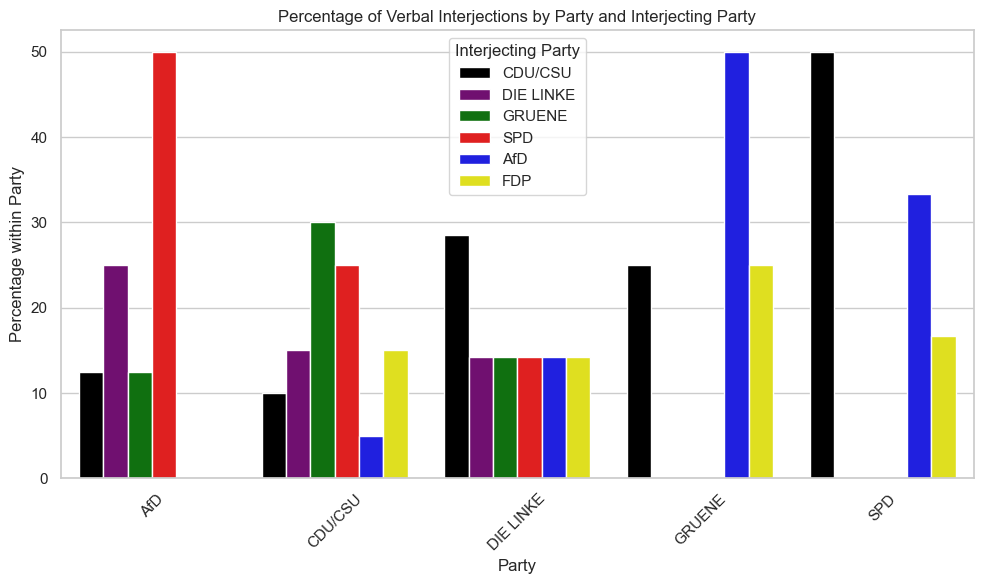

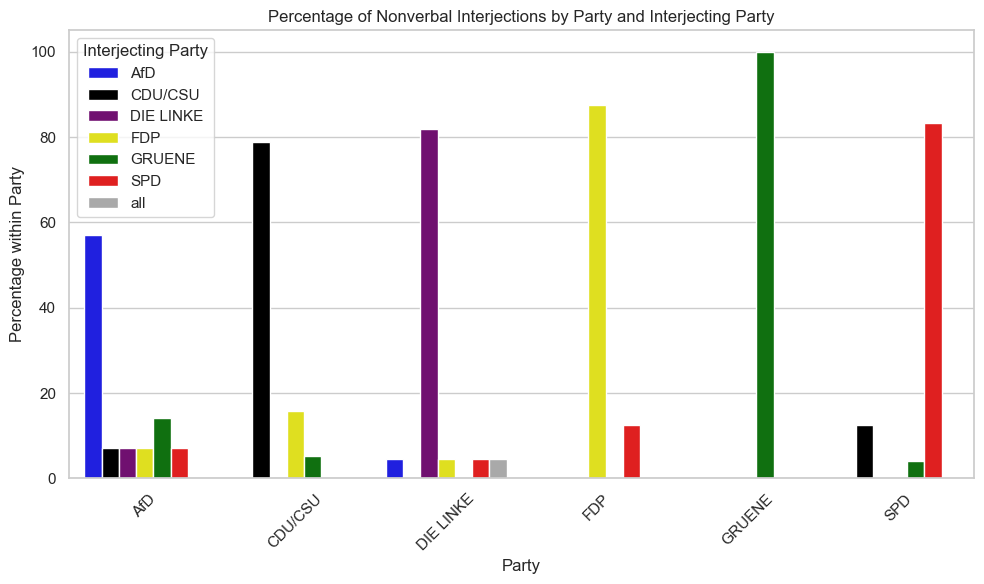

SAME


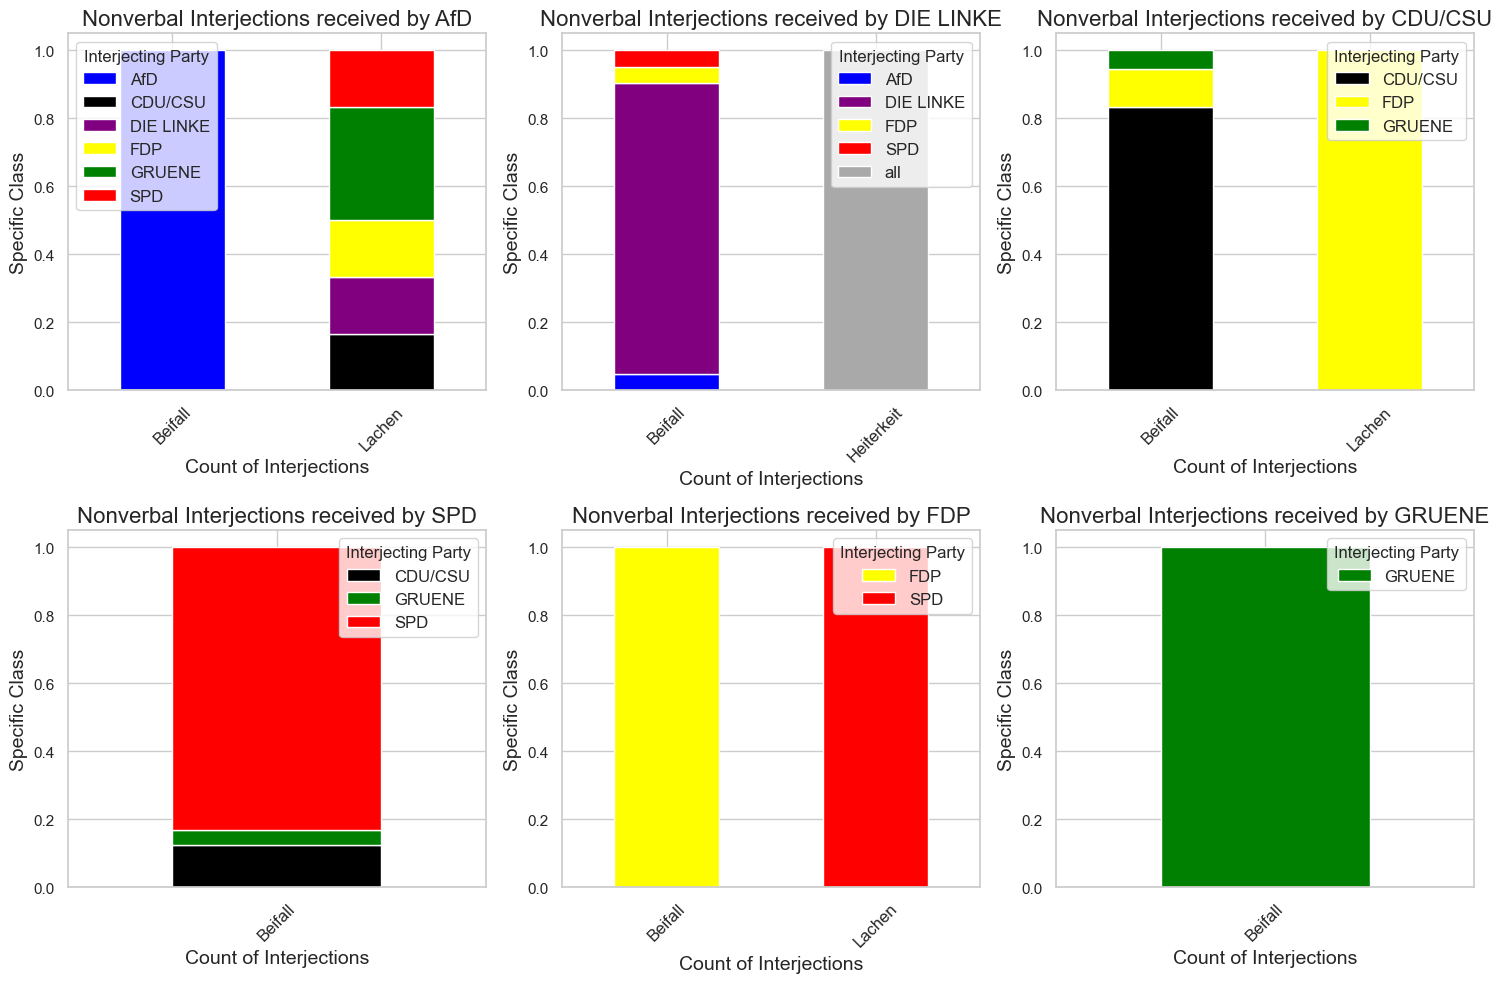

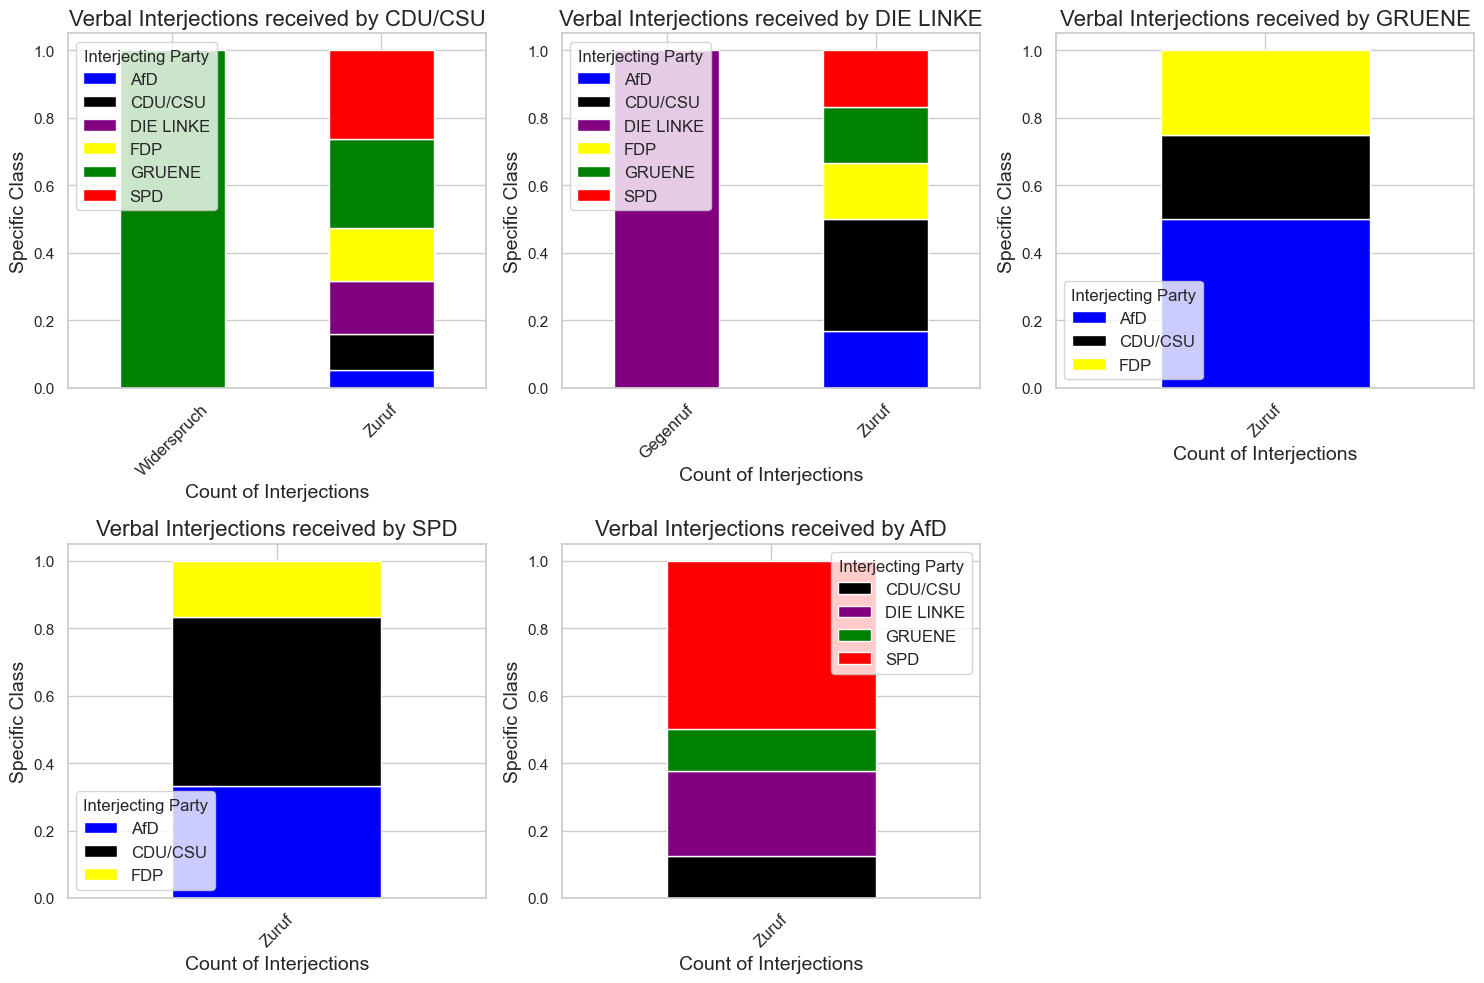

In [102]:
def group_interjections_by_party(df, interjection_type_column='Interjection Type'):
    """
    Group interjections by party and interjecting party, calculate count and percentage within party for each type.

    Args:
        df (pd.DataFrame): DataFrame containing the interjections with columns 'Party', 'Interjection Type', and 'Interjecting Party'.
        interjection_type_column (str): The column name representing the type of interjection (default is 'Interjection Type').

    Returns:
        tuple: Three DataFrames containing grouped and processed verbal, nonverbal, and all interjections.
    """
    # Group all interjections
    grouped_all = df.groupby(
        ['Party', interjection_type_column, 'Interjecting Party']
    ).size().reset_index(name='Count')

    party_totals_all = grouped_all.groupby('Party')['Count'].transform('sum')
    grouped_all['Percentage within Party'] = (grouped_all['Count'] / party_totals_all) * 100

    # Filter for verbal interjections
    verbal_df = df[df[interjection_type_column] == 'Verbal']
    grouped_verbal = verbal_df.groupby(
        ['Party', interjection_type_column, 'Interjecting Party']
    ).size().reset_index(name='Count')

    party_totals_verbal = grouped_verbal.groupby('Party')['Count'].transform('sum')
    grouped_verbal['Percentage within Party'] = (grouped_verbal['Count'] / party_totals_verbal) * 100

    # Filter for nonverbal interjections
    nonverbal_df = df[df[interjection_type_column] == 'Nonverbal']
    grouped_nonverbal = nonverbal_df.groupby(
        ['Party', interjection_type_column, 'Interjecting Party']
    ).size().reset_index(name='Count')

    party_totals_nonverbal = grouped_nonverbal.groupby('Party')['Count'].transform('sum')
    grouped_nonverbal['Percentage within Party'] = (grouped_nonverbal['Count'] / party_totals_nonverbal) * 100

    return grouped_all, grouped_verbal, grouped_nonverbal, verbal_df, nonverbal_df



grouped_all_same, grouped_verbal_same, grouped_nonverbal_same, verbal_interjections_same, nonverbal_interjections_same = group_interjections_by_party(five_sentences_parties_mentioned_same_exploded)

print(grouped_all_same)
print(grouped_verbal_same)
print(grouped_nonverbal_same)


party_colors = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'GRUENE': 'green',
    'AfD': 'blue',
    'FDP': 'yellow',
    'DIE LINKE': 'purple',
    'parteilos': 'grey',
    'Die PARTEI': 'darkred',
    'LKR': 'darkblue',
    'all': 'darkgrey',
    'Unknown': 'lightgrey',
}

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Percentage within Party', hue='Interjecting Party',
            data=grouped_verbal_same, palette=party_colors)
plt.title('Percentage of Verbal Interjections by Party and Interjecting Party')
plt.xlabel('Party')
plt.ylabel('Percentage within Party')
plt.xticks(rotation=45)
plt.legend(title='Interjecting Party')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Percentage within Party', hue='Interjecting Party',
            data=grouped_nonverbal_same, palette=party_colors)
plt.title('Percentage of Nonverbal Interjections by Party and Interjecting Party')
plt.xlabel('Party')
plt.ylabel('Percentage within Party')
plt.xticks(rotation=45)
plt.legend(title='Interjecting Party')
plt.tight_layout()
plt.show()

def plot_interjection_distribution_received(df, color, title_suffix=""):
    """
    Plot interjection distributions for each receiving party,
    showing interjection types (Specific Class) as stacked bars in a grid.

    Args:
        df (pd.DataFrame): DataFrame with columns 'Interjecting Party', 'Party' (Receiving Party), and 'Specific Class'.
        color (dict): Dictionary mapping specific classes to colors.
        title_suffix (str): Suffix to append to the title (e.g., 'Nonverbal' or 'Verbal').
    """
    # Group the data by interjecting party, receiving party, and specific class
    grouped = df.groupby([
        'Interjecting Party', 'Party', 'Specific Class'
    ]).size().reset_index(name='Count')

    # Get the list of all parties
    all_parties = grouped['Party'].unique()

    # Determine the number of rows and columns for the grid
    num_parties = len(all_parties)
    ncols = 3  # Adjust based on how many columns you want
    nrows = (num_parties + ncols - 1) // ncols  # Calculate number of rows needed

    # Create the figure and subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

    # Flatten axes array for easier indexing
    axes = axes.flatten()

    # Iterate through each party and create a plot in the grid
    for i, party in enumerate(all_parties):
        # Filter data for the current receiving party
        party_data = grouped[grouped['Party'] == party]

        # Pivot data to structure for stacked bar plot
        pivot = party_data.pivot_table(
            index='Specific Class',
            columns='Interjecting Party',
            values='Count',
            aggfunc='sum',
            fill_value=0
        )

        pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0)

        # Plot stacked bar chart
        ax = axes[i]
        pivot_normalized.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            color=color
        )

        # Customize plot
        ax.set_title(f'{title_suffix} Interjections received by {party}', fontsize=16)
        ax.set_xlabel('Count of Interjections', fontsize=14)
        ax.set_ylabel('Specific Class', fontsize=14)
        ax.tick_params(axis='x', rotation=45, labelsize=12)
        ax.legend(title='Interjecting Party', fontsize=12)

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

print("SAME")
plot_interjection_distribution_received(nonverbal_interjections_same, party_colors, title_suffix="Nonverbal")
plot_interjection_distribution_received(verbal_interjections_same, party_colors, title_suffix="Verbal")



OTHERS MENTIONED

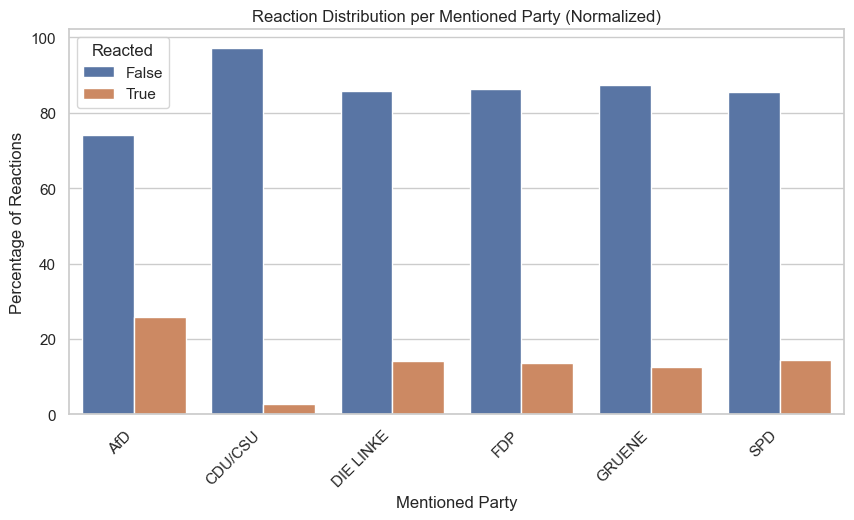

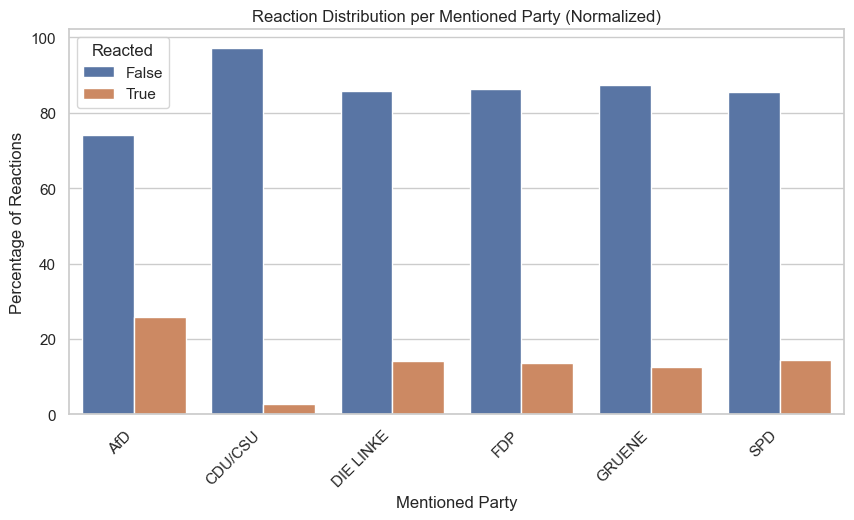

C:\Users\hanna\AppData\Local\Temp\ipykernel_16260\665886378.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


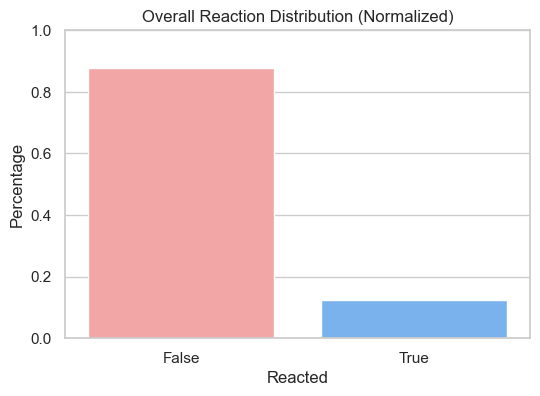

C:\Users\hanna\AppData\Local\Temp\ipykernel_16260\665886378.py:144: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(Percentage=x["Count"] / x["Count"].sum()))


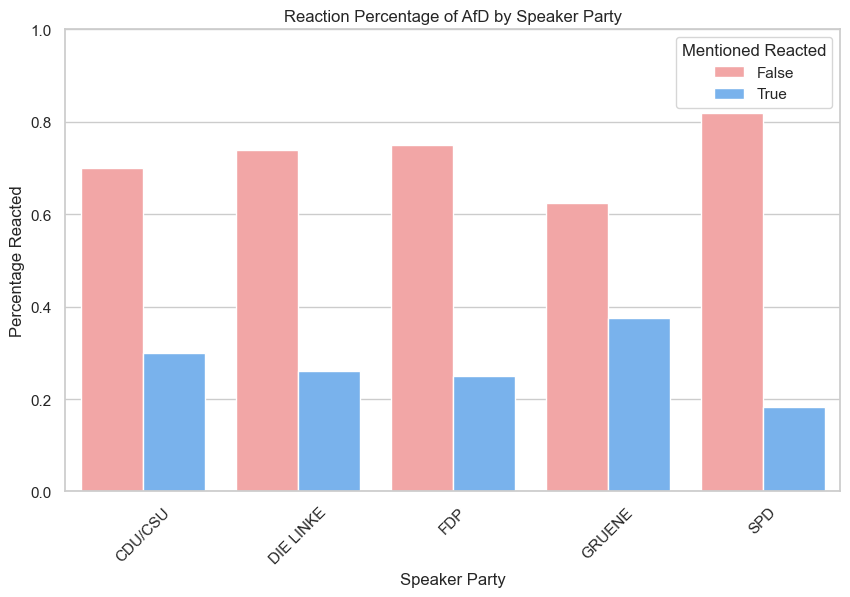

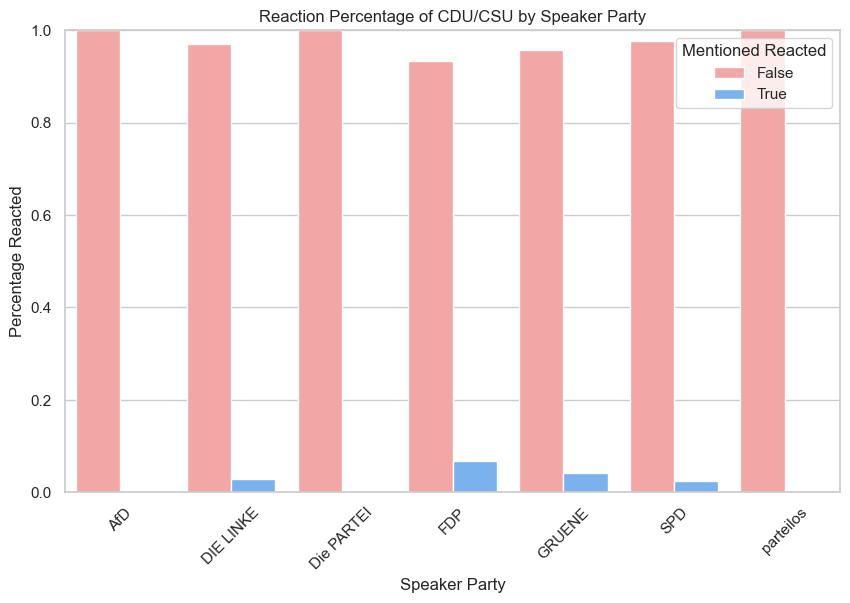

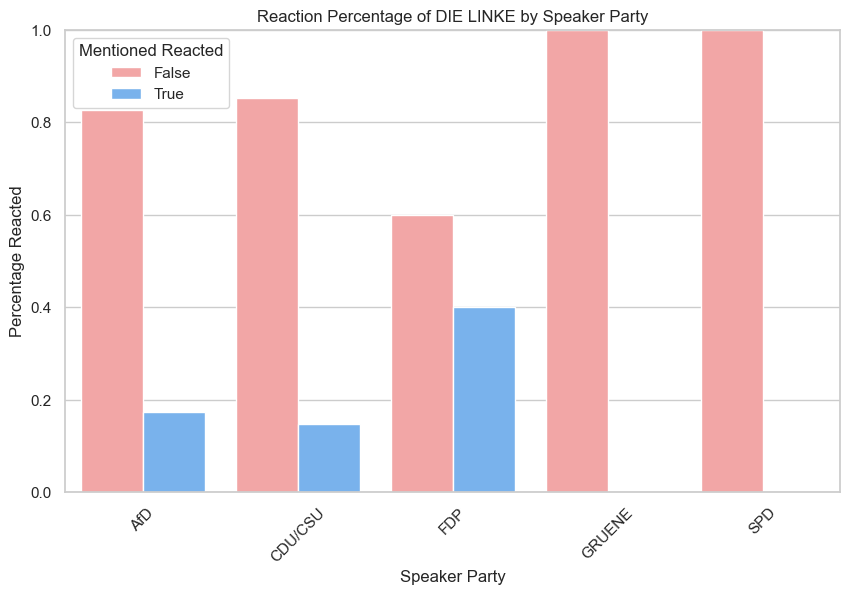

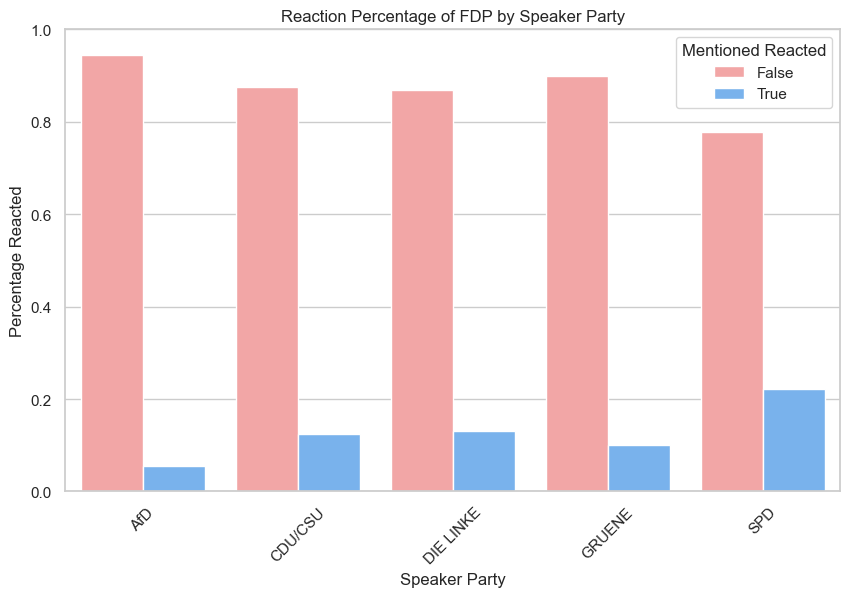

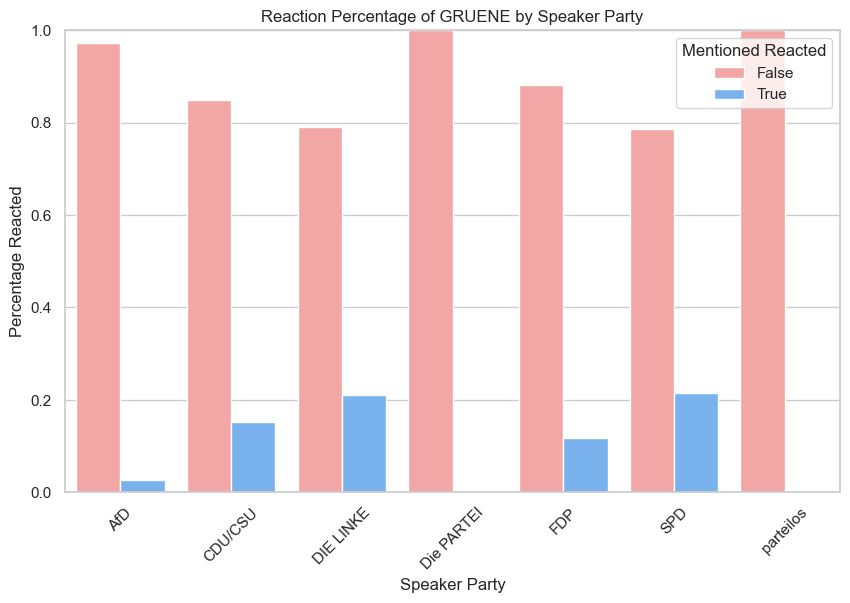

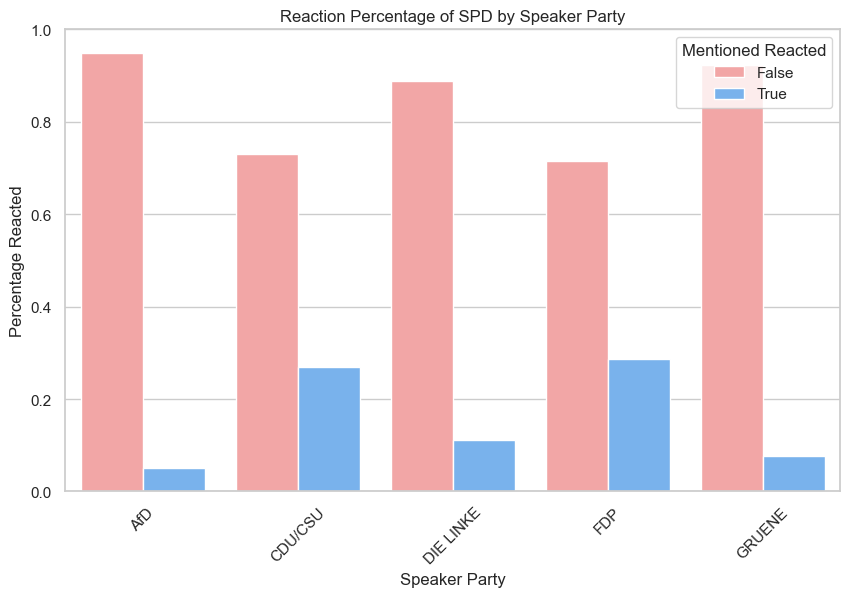

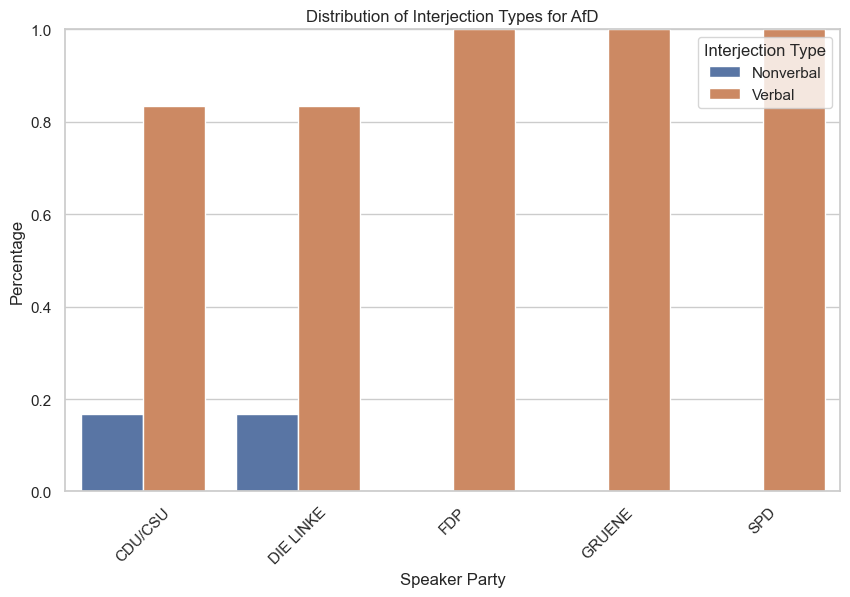

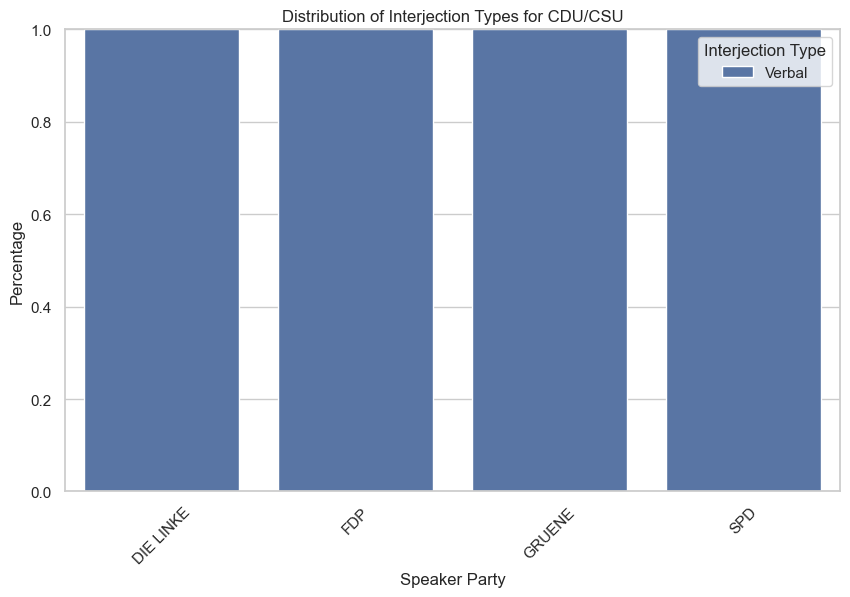

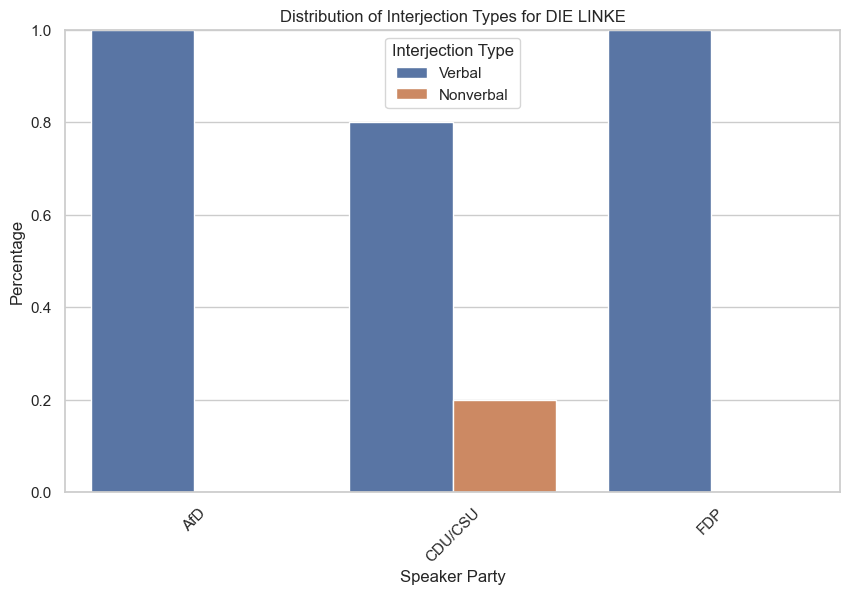

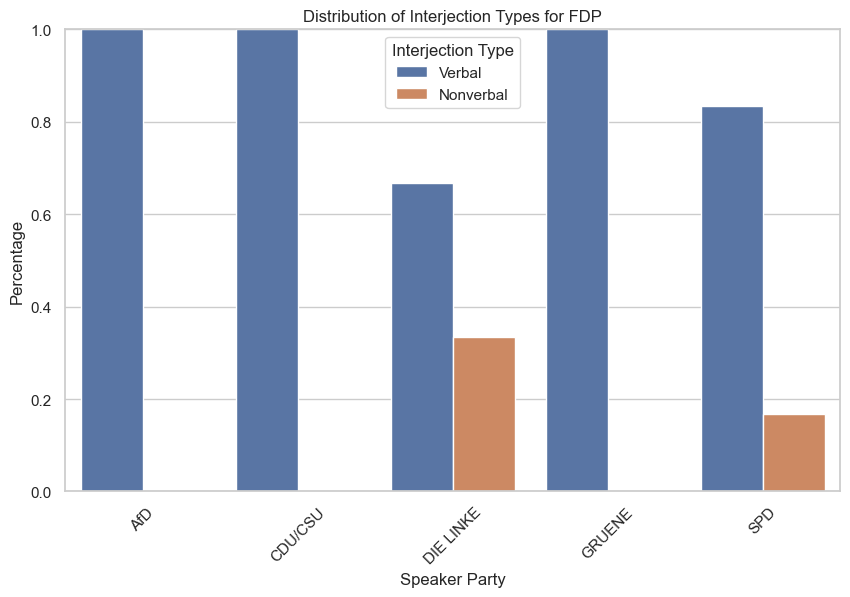

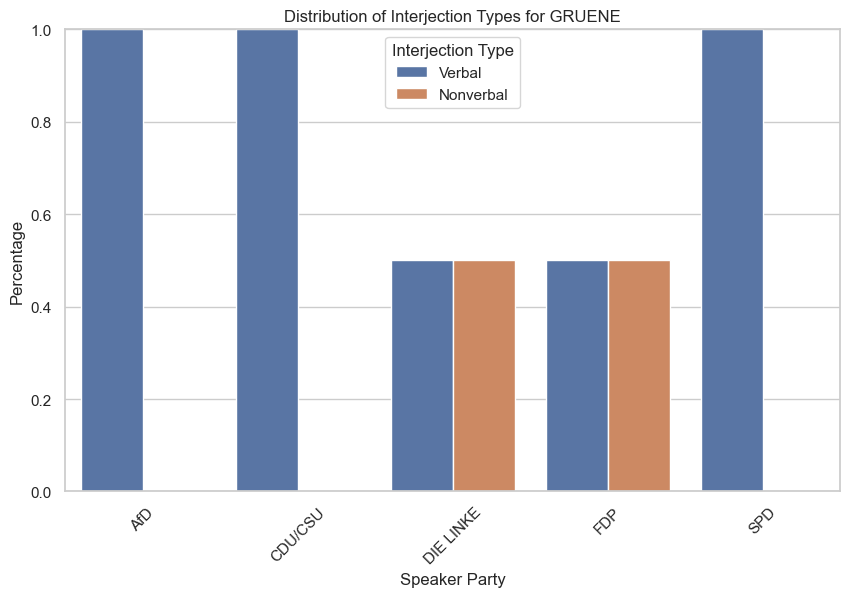

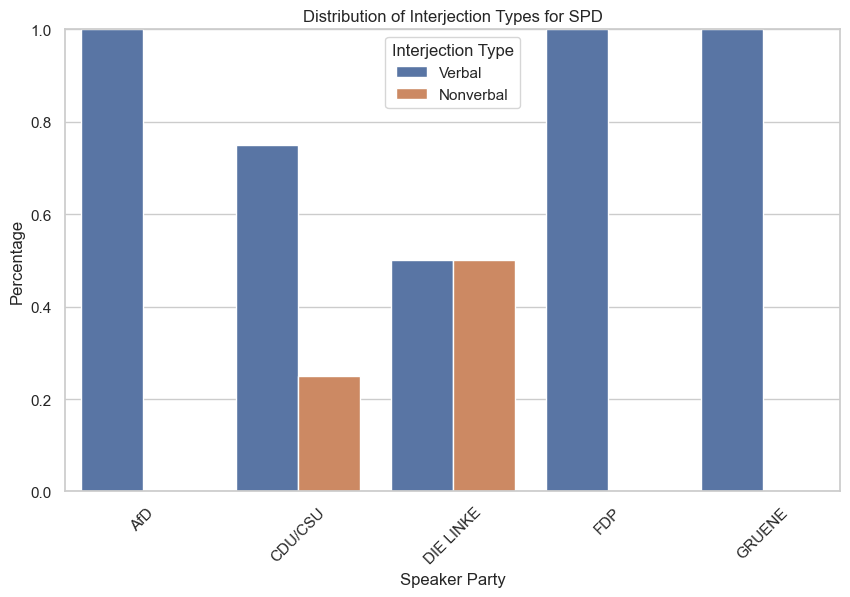

<Figure size 1000x600 with 0 Axes>

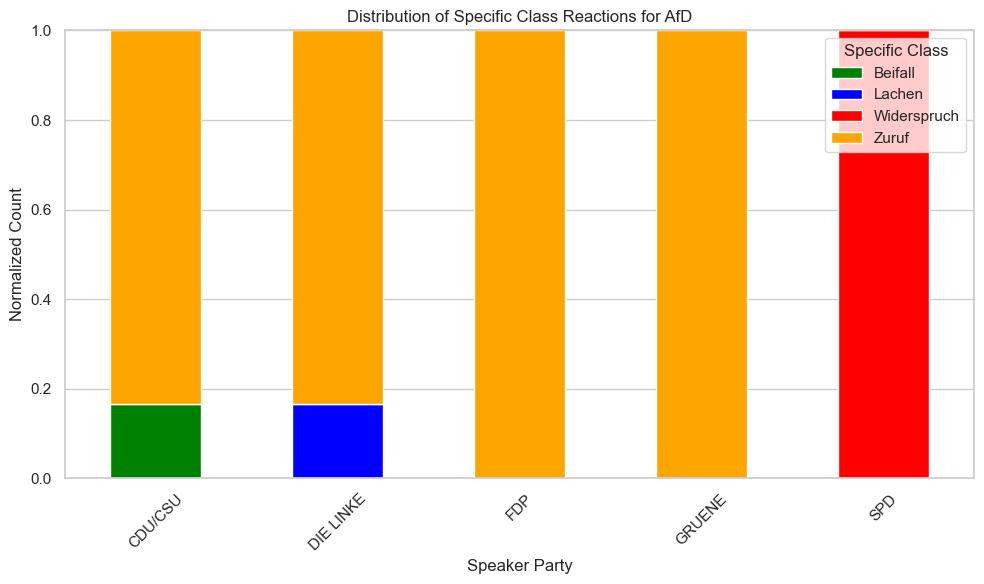

<Figure size 1000x600 with 0 Axes>

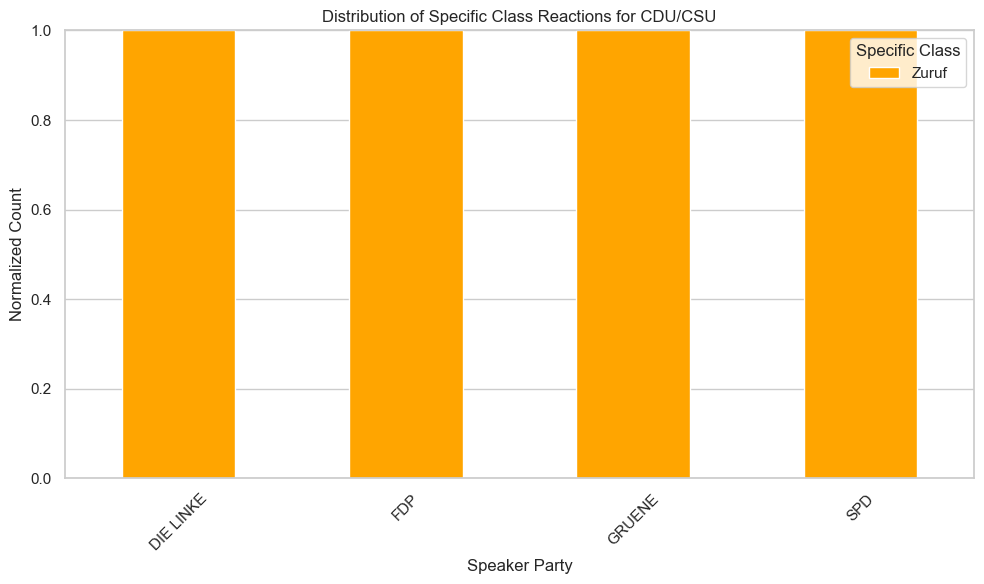

<Figure size 1000x600 with 0 Axes>

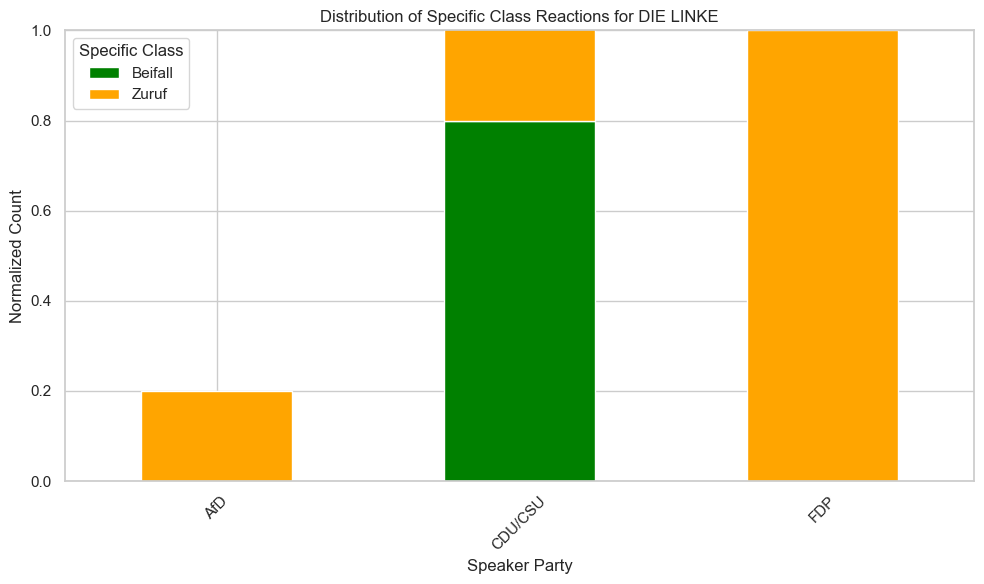

<Figure size 1000x600 with 0 Axes>

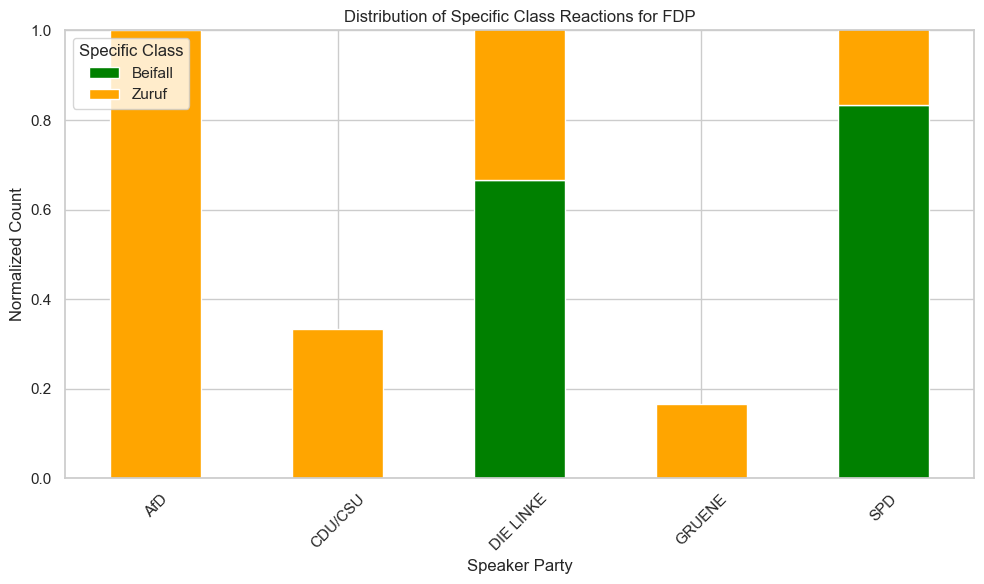

<Figure size 1000x600 with 0 Axes>

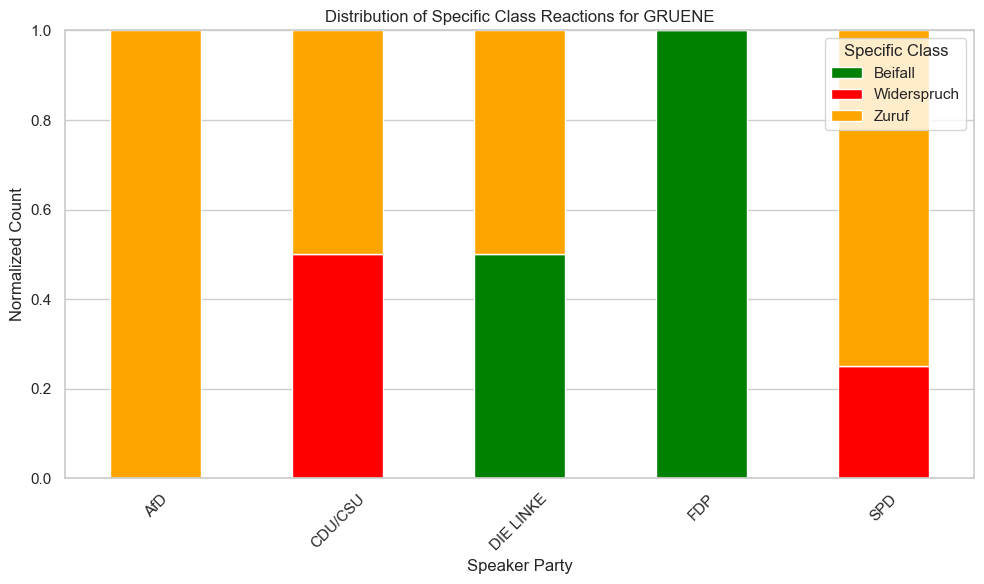

<Figure size 1000x600 with 0 Axes>

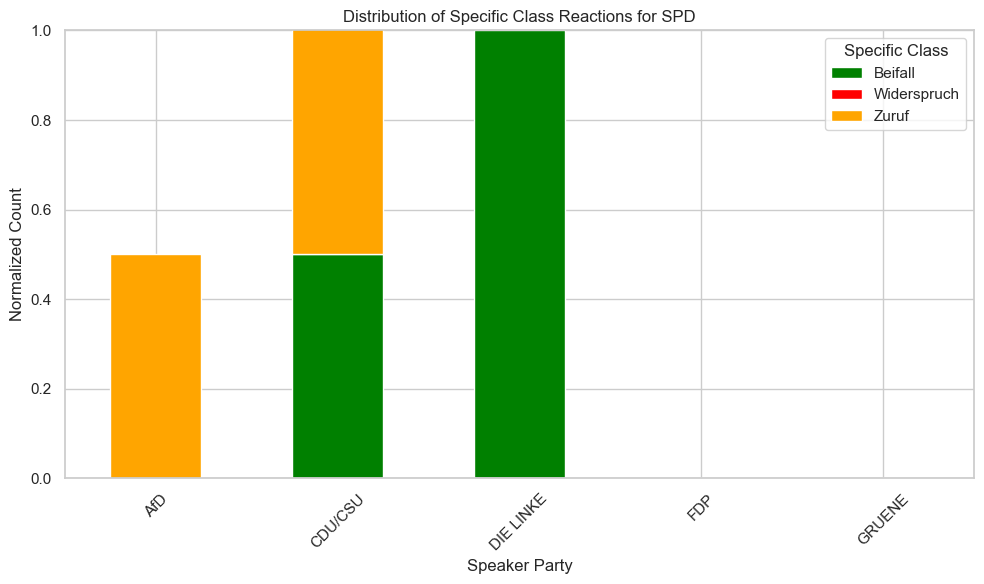

In [103]:

def add_mentioned_reacted_column(df, mentioned_party_column='Mentioned parties',
                                 interjecting_party_column='Interjecting Party',
                                 next_interjections_column='next_interjections'):
    df = df.explode(mentioned_party_column)

    def check_mentioned_reacted(row):
        if not isinstance(row[next_interjections_column], list):
            return False
        interjecting_parties = {tup[2] for tup in row[next_interjections_column] if len(tup) > 2}
        return row[mentioned_party_column] in interjecting_parties

    df['Mentioned Reacted'] = df.apply(check_mentioned_reacted, axis=1)

    return df

five_sentences_parties_mentioned_reacted_other = add_mentioned_reacted_column(five_sentences_parties_mentioned_other)

grouped_interjections_other = (
    five_sentences_parties_mentioned_reacted_other
    .groupby(["Party", "Mentioned parties", "Mentioned Reacted"])
    .size()
    .reset_index(name="Count")
)

grouped_interjections_no_dict_other = (
    five_sentences_parties_mentioned_reacted_other
    .groupby(["Mentioned parties", "Mentioned Reacted"])
    .size()
    .reset_index(name="Count")
)

grouped_interjections_no_dict_mentioned= (
    five_sentences_parties_mentioned_reacted_other
    .groupby(["Mentioned Reacted"])
    .size()
    .reset_index(name="Count")
)

def normalize_counts(df, group_by_cols):
    """Normalizes counts within specified groups to get percentages."""
    df["Total"] = df.groupby(group_by_cols)["Count"].transform("sum")
    df["Percentage"] = df["Count"] / df["Total"] * 100
    return df.drop(columns=["Total"])

grouped_interjections_no_dict_other_normalized = normalize_counts(
    grouped_interjections_no_dict_other, ["Mentioned parties"]
)


sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(
    data=grouped_interjections_no_dict_other_normalized,
    x="Mentioned parties",
    y="Percentage",
    hue="Mentioned Reacted",
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Mentioned Party")
plt.ylabel("Percentage of Reactions")
plt.title("Reaction Distribution per Mentioned Party (Normalized)")
plt.legend(title="Reacted")
plt.show()


sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(
    data=grouped_interjections_no_dict_other_normalized,
    x="Mentioned parties",
    y="Percentage",
    hue="Mentioned Reacted",
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Mentioned Party")
plt.ylabel("Percentage of Reactions")
plt.title("Reaction Distribution per Mentioned Party (Normalized)")
plt.legend(title="Reacted")
plt.show()


total_count = grouped_interjections_no_dict_mentioned["Count"].sum()

reacted_percentages = (
    grouped_interjections_no_dict_mentioned.groupby("Mentioned Reacted")["Count"].sum()
    / total_count
).reset_index()

reacted_percentages.columns = ["Mentioned Reacted", "Percentage"]

plt.figure(figsize=(6, 4))
sns.barplot(
    data=reacted_percentages,
    x="Mentioned Reacted",
    y="Percentage",
    palette=["#FF9999", "#66B2FF"]
)
plt.xlabel("Reacted")
plt.ylabel("Percentage")
plt.title("Overall Reaction Distribution (Normalized)")
plt.ylim(0, 1)
plt.show()

normalized_df = (
    grouped_interjections_other
    .groupby(["Mentioned parties", "Party"])
    .apply(lambda x: x.assign(Percentage=x["Count"] / x["Count"].sum()))
    .reset_index(drop=True)
)

mentioned_parties = normalized_df["Mentioned parties"].unique()

for mentioned_party in mentioned_parties:
    plt.figure(figsize=(10, 6))

    subset = normalized_df[normalized_df["Mentioned parties"] == mentioned_party]

    sns.barplot(
        data=subset,
        x="Party",
        y="Percentage",
        hue="Mentioned Reacted",
        palette=["#FF9999", "#66B2FF"]
    )

    plt.xlabel("Speaker Party")
    plt.ylabel("Percentage Reacted")
    plt.title(f"Reaction Percentage of {mentioned_party} by Speaker Party")
    plt.ylim(0, 1)  # Scale between 0 and 1
    plt.xticks(rotation=45)
    plt.legend(title="Mentioned Reacted")

    plt.show()

five_sentences_parties_mentioned_reacted_other_exploded = five_sentences_parties_mentioned_reacted_other.explode('next_interjections')
five_sentences_parties_mentioned_reacted_other_exploded_info = extract_interjection_info(five_sentences_parties_mentioned_reacted_other_exploded)


# Filter for cases where the mentioned party reacted and the interjecting party is the same as mentioned party
filtered_df = five_sentences_parties_mentioned_reacted_other_exploded_info[
    (five_sentences_parties_mentioned_reacted_other_exploded_info["Mentioned Reacted"]) &
    (five_sentences_parties_mentioned_reacted_other_exploded_info["Interjecting Party"] == five_sentences_parties_mentioned_reacted_other_exploded_info["Mentioned parties"])
]

grouped_interjection_types = (
    filtered_df
    .groupby(["Mentioned parties", "Interjecting Party", "Party", "Interjection Type"])
    .size()
    .reset_index(name="Count")
)

grouped_interjection_types["Percentage"] = (
    grouped_interjection_types["Count"] /
    grouped_interjection_types.groupby(["Mentioned parties", "Party"])["Count"].transform("sum")
)

sns.set(style="whitegrid")

for mentioned_party in grouped_interjection_types["Mentioned parties"].unique():
    plt.figure(figsize=(10, 6))

    grouped_interjection_types["Percentage"] = (
    grouped_interjection_types.groupby(["Mentioned parties", "Party"])["Count"]
    .transform(lambda x: x / x.sum())
)

    subset = grouped_interjection_types[grouped_interjection_types["Mentioned parties"] == mentioned_party]

    sns.barplot(
        data=subset,
        x="Party",
        y="Percentage",
        hue="Interjection Type"
    )

    plt.title(f"Distribution of Interjection Types for {mentioned_party}")
    plt.xlabel("Speaker Party")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.legend(title="Interjection Type")
    plt.ylim(0, 1)

    plt.show()

sns.set(style="whitegrid")

color_map = {
    "Beifall": "green",
    "Widerspruch": "red",
    "Zuruf": "orange",
    "Lachen": "blue"
}

grouped_interjection_types_spec = (
    filtered_df
    .groupby(["Mentioned parties", "Interjecting Party", "Party", "Interjection Type", "Specific Class"])
    .size()
    .reset_index(name="Count")
)


grouped_interjection_types_spec["Percentage"] = (
    grouped_interjection_types.groupby(["Mentioned parties", "Party"])["Count"]
    .transform(lambda x: x / x.sum())  # Normalize per speaker party
)

for mentioned_party in grouped_interjection_types_spec["Mentioned parties"].unique():
    plt.figure(figsize=(10, 6))

    # Filter for the current mentioned party
    subset = grouped_interjection_types_spec[grouped_interjection_types_spec["Mentioned parties"] == mentioned_party]

    class_grouped = subset.pivot_table(index="Party", columns="Specific Class", values="Percentage", aggfunc="sum", fill_value=0)

    ax = class_grouped.plot(kind='bar', stacked=True, figsize=(10, 6),
                            color=[color_map.get(x, 'gray') for x in class_grouped.columns])

    plt.title(f"Distribution of Specific Class Reactions for {mentioned_party}")
    plt.xlabel("Speaker Party")
    plt.ylabel("Normalized Count")
    plt.xticks(rotation=45)
    plt.legend(title="Specific Class")
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()


In [109]:
#mentioned_other_reacted_mentioned = #five_sentences_parties_mentioned_reacted_other_exploded[five_sentences_parties_mentioned_reacted_other_exploded["Mentioned #Reacted"] == True]

mentioned_other_reacted_mentioned = five_sentences_parties_mentioned_reacted_other_exploded[
    (five_sentences_parties_mentioned_reacted_other_exploded["Mentioned Reacted"]) &
    (five_sentences_parties_mentioned_reacted_other_exploded["Interjecting Party"] == five_sentences_parties_mentioned_reacted_other_exploded["Mentioned parties"])
]


In [110]:
mentioned_other_reacted_mentioned

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,prev_sentence,next_sentence,is_last_sentence,Mentioned parties,Mentioned Reacted,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class
919,BT_19_235.xml,19,2021-06-23,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,Er ist eines der ersten von über 200 Opfern re...,Ich möchte Sie bezüglich dieser Stiftung fragen:,True,AfD,True,Verbal,AfD,Dr. Götz Frömming,Unsinn!,Zuruf
919,BT_19_235.xml,19,2021-06-23,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,Er ist eines der ersten von über 200 Opfern re...,Ich möchte Sie bezüglich dieser Stiftung fragen:,True,AfD,True,Verbal,AfD,Dr. Rainer Kraft,Unverschämte Behauptung!,Zuruf
1768,BT_19_235.xml,19,2021-06-23,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,11,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,Die AfD setzt deshalb auf die Kräfte der sozia...,"Die Linken möchten, dass jeder einen einklagba...",True,DIE LINKE,True,Verbal,DIE LINKE,Niema Movassat,Sehr guter Entwurf!,Zuruf
1769,BT_19_235.xml,19,2021-06-23,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,12,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,Dass es Die Linke mit der sozialen Marktwirtsc...,"Zwangsräumungen sollen unzulässig sein, wenn k...",True,DIE LINKE,True,Verbal,DIE LINKE,Niema Movassat,"Da kippt die AfD um, wenn sie das hört!",Zuruf
1779,BT_19_235.xml,19,2021-06-23,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,18,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,haben wesentlich zur Wohnungsnot in diesem Lan...,Am Ende kann man den Inhalt Ihrer Anträge kurz...,True,DIE LINKE,True,Verbal,DIE LINKE,Niema Movassat,Haben Sie eigentlich eine andere Antwort außer...,Zuruf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17606,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33023,6,Paul Ziemiak,mp,männlich,CDU/CSU,...,Das ist das große Verdienst vor allem der Bund...,"Wenn wir uns die letzte Krise anschauen, wolle...",True,SPD,True,Verbal,SPD,Yasmin Fahimi,Sehr gerne!,Zuruf
17650,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,Ich will nur den Marshallplan mit Afrika erwäh...,Deutschland war der kranke Mann Europas: Masse...,True,SPD,True,Verbal,SPD,Unknown,None,Zuruf
17650,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,Ich will nur den Marshallplan mit Afrika erwäh...,Deutschland war der kranke Mann Europas: Masse...,True,GRUENE,True,Verbal,GRUENE,Unknown,None,Zuruf
17681,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,...,Wir haben heute Rekordausgaben für Soziales.,Kinderarmut ist immer Eltern- und Familienarmut.,True,SPD,True,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf


In [111]:
mentioned_same_reacted = five_sentences_parties_mentioned_same_exploded[
    (five_sentences_parties_mentioned_same_exploded["next_nonverbal_interjection"] == True) |
    (five_sentences_parties_mentioned_same_exploded["next_verbal_interjection"] == True)
]

In [112]:
mentioned_same_reacted

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Sentences,prev_sentence,next_sentence,is_last_sentence,Mentioned parties,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class
710,BT_19_235.xml,19,2021-06-23,Befragung der Bundesregierung,32527,4,Katja Mast,mp,weiblich,SPD,...,Wir von der SPD lehnen dies ab.,Im CDU-Wirtschaftsministerium wird jetzt auch ...,Lehnen Sie eine weitere Erhöhung des gesetzlic...,True,[SPD],Nonverbal,SPD,all,None,Beifall
1147,BT_19_235.xml,19,2021-06-23,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,...,Man möchte die Alternative für Deutschland so ...,"Meine Damen und Herren, ich habe in meinen vie...","und zwar unabhängig vom Kandidaten, den sie au...",True,[AfD],Verbal,SPD,Marianne Schieder,Alternative für Deutschland? Schrecken für Deu...,Zuruf
1147,BT_19_235.xml,19,2021-06-23,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,...,Man möchte die Alternative für Deutschland so ...,"Meine Damen und Herren, ich habe in meinen vie...","und zwar unabhängig vom Kandidaten, den sie au...",True,[AfD],Verbal,SPD,Dr. Karamba Diaby,Reden Sie zum Thema! Was hat denn das mit dem ...,Zuruf
1152,BT_19_235.xml,19,2021-06-23,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,...,Man maß zudem bei Anträgen im Zusammenhang mit...,geleitet von dem Wunsch nach Verteufelung und ...,Erklären Sie das mal schlüssig den Menschen da...,True,[AfD],Verbal,DIE LINKE,Nicole Gohlke,None,Zuruf
1152,BT_19_235.xml,19,2021-06-23,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,...,Man maß zudem bei Anträgen im Zusammenhang mit...,geleitet von dem Wunsch nach Verteufelung und ...,Erklären Sie das mal schlüssig den Menschen da...,True,[AfD],Verbal,GRUENE,Ulle Schauws,None,Zuruf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17786,BT_19_239.xml,19,2021-09-07,a) Zweite und dritte Beratung des von den Frak...,33026,1,Sabine Dittmar,mp,weiblich,SPD,...,"Herr Gesundheitsminister Spahn, wären Sie glei...",es ist jedoch ordnungsgemäß durchgeführt worden.,"Diese Randbemerkung vorweggestellt, möchte ich...",True,[SPD],Nonverbal,SPD,all,None,Beifall
18542,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,Deshalb sind wir als SPD-Bundestagsfraktion un...,"– Wir wollen, dass die Menschen in unserem Lan...",Dieser Rechtsanspruch ist für uns auch ein wic...,True,[SPD],Nonverbal,SPD,all,None,Beifall
18542,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,Deshalb sind wir als SPD-Bundestagsfraktion un...,"– Wir wollen, dass die Menschen in unserem Lan...",Dieser Rechtsanspruch ist für uns auch ein wic...,True,[SPD],Nonverbal,GRUENE,all,None,Beifall
18542,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,Deshalb sind wir als SPD-Bundestagsfraktion un...,"– Wir wollen, dass die Menschen in unserem Lan...",Dieser Rechtsanspruch ist für uns auch ein wic...,True,[SPD],Nonverbal,CDU/CSU,Dr. Katja Leikert,None,Beifall


In [113]:
mentioned_same_reacted.to_csv("mentioned_same_reacted.csv", sep=';', index=False)
mentioned_other_reacted_mentioned.to_csv("mentioned_other_reacted_mentioned.csv", sep=';', index=False)